**Author**
Name: Imam Maghfir Ramadhan

##**Loading Data**

In [126]:
#READING DATA FROM GOOGLE DRIVE - WILL BE DELETED(?)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

from google.colab import drive
os.chdir('/content/drive/MyDrive/PMI - HM Sampoerna')
os.getcwd()

'/content/drive/MyDrive/PMI - HM Sampoerna'

In [127]:
import pandas as pd

df = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
164819,2023-10,YISHUN,5 ROOM,336C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,91 years 01 month,670000.0
164820,2023-10,YISHUN,EXECUTIVE,406,YISHUN AVE 6,07 TO 09,148.0,Maisonette,1988,63 years 11 months,830000.0
164821,2023-10,YISHUN,EXECUTIVE,391,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,63 years 08 months,753000.0
164822,2023-10,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,63 years,808000.0


##**Descriptive Statistics**

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164824 entries, 0 to 164823
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                164824 non-null  object 
 1   town                 164824 non-null  object 
 2   flat_type            164824 non-null  object 
 3   block                164824 non-null  object 
 4   street_name          164824 non-null  object 
 5   storey_range         164824 non-null  object 
 6   floor_area_sqm       164824 non-null  float64
 7   flat_model           164824 non-null  object 
 8   lease_commence_date  164824 non-null  int64  
 9   remaining_lease      164824 non-null  object 
 10  resale_price         164824 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.8+ MB


In [129]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,164824.000000,164824.000000,1.648240e+05
mean,97.343703,1995.799495,4.886333e+05
std,24.029680,13.905167,1.690606e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.650000e+05
50%,93.000000,1996.000000,4.588880e+05
75%,112.000000,2009.000000,5.800000e+05
max,249.000000,2022.000000,1.500000e+06


**Highlights:**
- There is no any null value in each column in the dataset
- Each quatitative columns ("floor_area_sqm", "lease_commence_date", "resale_price") mean is almost equal to its median which indicates the distribution of the quantitative data is normal  

##**Feature Engineering**

In [130]:
# Extracting "storey_range" to get storey median
import statistics
def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median
df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))

# Converting remaining_lease to month unit
def convert_to_months(lease):
    parts = lease.split()
    months = 0

    for i in range(len(parts)):
        if parts[i] == "years" or parts[i] == "year":
            years = int(parts[i - 1])
            months += years * 12
        elif parts[i] == "months" or parts[i] == "month":
            months += int(parts[i - 1])
    return months

df['remaining_lease_in_months'] = df['remaining_lease'].apply(convert_to_months)

# Combining several features
df['flat_town_type'] = df['town'] + ' ' + df['flat_type']
df['flat_town_model'] = df['town'] + ' ' + df['flat_model']
df['flat_type_model'] = df['flat_type'] + ' ' + df['flat_model']

# Enriching data feature from column "town"

# a.) Town region categorization -- CCR (Core Central Region), RCR (Rest of Central Region), or OCR (Outside Central Region)
town_region = {'ANG MO KIO' : 'OCR',
              'BEDOK' : 'OCR',
              'BISHAN' : 'RCR',
              'BUKIT BATOK' : 'OCR',
              'BUKIT MERAH' : 'CCR',
              'BUKIT PANJANG' : 'OCR',
              'BUKIT TIMAH' : 'CCR',
              'CENTRAL AREA' : 'CCR',
              'CHOA CHU KANG' : 'OCR',
              'CLEMENTI' : 'OCR',
              'GEYLANG' : 'RCR',
              'HOUGANG' : 'OCR',
              'JURONG EAST' : 'OCR',
              'JURONG WEST' : 'OCR',
              'KALLANG/WHAMPOA' : 'RCR',
              'MARINE PARADE' : 'RCR',
              'PASIR RIS' : 'OCR',
              'PUNGGOL' : 'OCR',
              'QUEENSTOWN' : 'RCR',
              'SEMBAWANG' : 'OCR',
              'SENGKANG' : 'OCR',
              'SERANGOON' : 'OCR',
              'TAMPINES' : 'OCR',
              'TOA PAYOH' : 'RCR',
              'WOODLANDS' : 'OCR',
              'YISHUN' : 'OCR'}

# b.) Town maturity categorization
town_maturity = {'ANG MO KIO' : 'MATURE',
                'BEDOK' : 'MATURE',
                'BISHAN' : 'MATURE',
                'BUKIT BATOK' : 'NON-MATURE',
                'BUKIT MERAH' : 'MATURE',
                'BUKIT PANJANG' : 'NON-MATURE',
                'BUKIT TIMAH' : 'MATURE',
                'CENTRAL AREA' : 'MATURE',
                'CHOA CHU KANG' : 'NON-MATURE',
                'CLEMENTI' : 'MATURE',
                'GEYLANG' : 'MATURE',
                'HOUGANG' : 'NON-MATURE',
                'JURONG EAST' : 'NON-MATURE',
                'JURONG WEST' : 'NON-MATURE',
                'KALLANG/WHAMPOA' : 'MATURE',
                'MARINE PARADE' : 'MATURE',
                'PASIR RIS' : 'MATURE',
                'PUNGGOL' : 'NON-MATURE',
                'QUEENSTOWN' : 'MATURE',
                'SEMBAWANG' : 'NON-MATURE',
                'SENGKANG' : 'NON-MATURE',
                'SERANGOON' : 'MATURE',
                'TAMPINES' : 'MATURE',
                'TOA PAYOH' : 'MATURE',
                'WOODLANDS' : 'NON-MATURE',
                'YISHUN' : 'NON-MATURE'}

df = df.assign(town_region=df['town'].replace(town_region, regex=True),
               town_maturity=df['town'].replace(town_maturity, regex=True))

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey_median,remaining_lease_in_months,flat_town_type,flat_town_model,flat_type_model,town_region,town_maturity
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,11.0,736,ANG MO KIO 2 ROOM,ANG MO KIO Improved,2 ROOM Improved,OCR,MATURE
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2.0,727,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2.0,749,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,5.0,745,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2.0,749,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164819,2023-10,YISHUN,5 ROOM,336C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,91 years 01 month,670000.0,14.0,1093,YISHUN 5 ROOM,YISHUN Improved,5 ROOM Improved,OCR,NON-MATURE
164820,2023-10,YISHUN,EXECUTIVE,406,YISHUN AVE 6,07 TO 09,148.0,Maisonette,1988,63 years 11 months,830000.0,8.0,767,YISHUN EXECUTIVE,YISHUN Maisonette,EXECUTIVE Maisonette,OCR,NON-MATURE
164821,2023-10,YISHUN,EXECUTIVE,391,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,63 years 08 months,753000.0,5.0,764,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,OCR,NON-MATURE
164822,2023-10,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,63 years,808000.0,11.0,756,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,OCR,NON-MATURE


***Additional Note***

**> Town Region Categorization**

Urban Redevelopment Authority (URA) has divided Singapore into three main regions, which the URA calls "market segments" (Core Central Region (CCR), Rest of Central Region (RCR), and Outside Central Region (OCR))

**> Town Maturity Categorization**

HDB estates/towns are divided into "mature" and "non-mature" estates. A mature estate is an older residential area that has been around for at least 20 years with more amenities.


*Sources:*
*   https://www.propertyguru.com.sg/property-guides/ccr-ocr-rcr-region-singapore-ura-map-21045
*   https://buycondo.sg/ccr-rcr-ocr/
*   https://dollarsandsense.sg/ccr-rcr-ocr-district-classifications-means-looking-property-purchase/

##**Data Encoding for Categorical Data**

In [131]:
flat_typeEnc = {'1 ROOM': 1,'2 ROOM': 2,'3 ROOM': 3,'4 ROOM': 4,'5 ROOM': 5,'EXECUTIVE': 6,'MULTI-GENERATION': 7}
town_regionEnc = {'OCR' : 1, 'RCR' : 2, 'CCR' : 3}
town_maturityEnc = {'NON-MATURE' : 0, 'MATURE' : 1}

df = df.assign(encoded_flat_type=df['flat_type'].replace(flat_typeEnc, regex=True),
               encoded_town_region=df['town_region'].replace(town_regionEnc, regex=True),
               encoded_town_maturity=df['town_maturity'].replace(town_maturityEnc, regex=True))

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,storey_median,remaining_lease_in_months,flat_town_type,flat_town_model,flat_type_model,town_region,town_maturity,encoded_flat_type,encoded_town_region,encoded_town_maturity
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,11.0,736,ANG MO KIO 2 ROOM,ANG MO KIO Improved,2 ROOM Improved,OCR,MATURE,2,1,1
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,2.0,727,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE,3,1,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,2.0,749,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE,3,1,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,5.0,745,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE,3,1,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,2.0,749,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,OCR,MATURE,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164819,2023-10,YISHUN,5 ROOM,336C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,91 years 01 month,...,14.0,1093,YISHUN 5 ROOM,YISHUN Improved,5 ROOM Improved,OCR,NON-MATURE,5,1,0
164820,2023-10,YISHUN,EXECUTIVE,406,YISHUN AVE 6,07 TO 09,148.0,Maisonette,1988,63 years 11 months,...,8.0,767,YISHUN EXECUTIVE,YISHUN Maisonette,EXECUTIVE Maisonette,OCR,NON-MATURE,6,1,0
164821,2023-10,YISHUN,EXECUTIVE,391,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,63 years 08 months,...,5.0,764,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,OCR,NON-MATURE,6,1,0
164822,2023-10,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,63 years,...,11.0,756,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,OCR,NON-MATURE,6,1,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164824 entries, 0 to 164823
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   month                      164824 non-null  object 
 1   town                       164824 non-null  object 
 2   flat_type                  164824 non-null  object 
 3   block                      164824 non-null  object 
 4   street_name                164824 non-null  object 
 5   storey_range               164824 non-null  object 
 6   floor_area_sqm             164824 non-null  float64
 7   flat_model                 164824 non-null  object 
 8   lease_commence_date        164824 non-null  int64  
 9   remaining_lease            164824 non-null  object 
 10  resale_price               164824 non-null  float64
 11  storey_median              164824 non-null  float64
 12  remaining_lease_in_months  164824 non-null  int64  
 13  flat_town_type             16

##**Univariate Analysis**

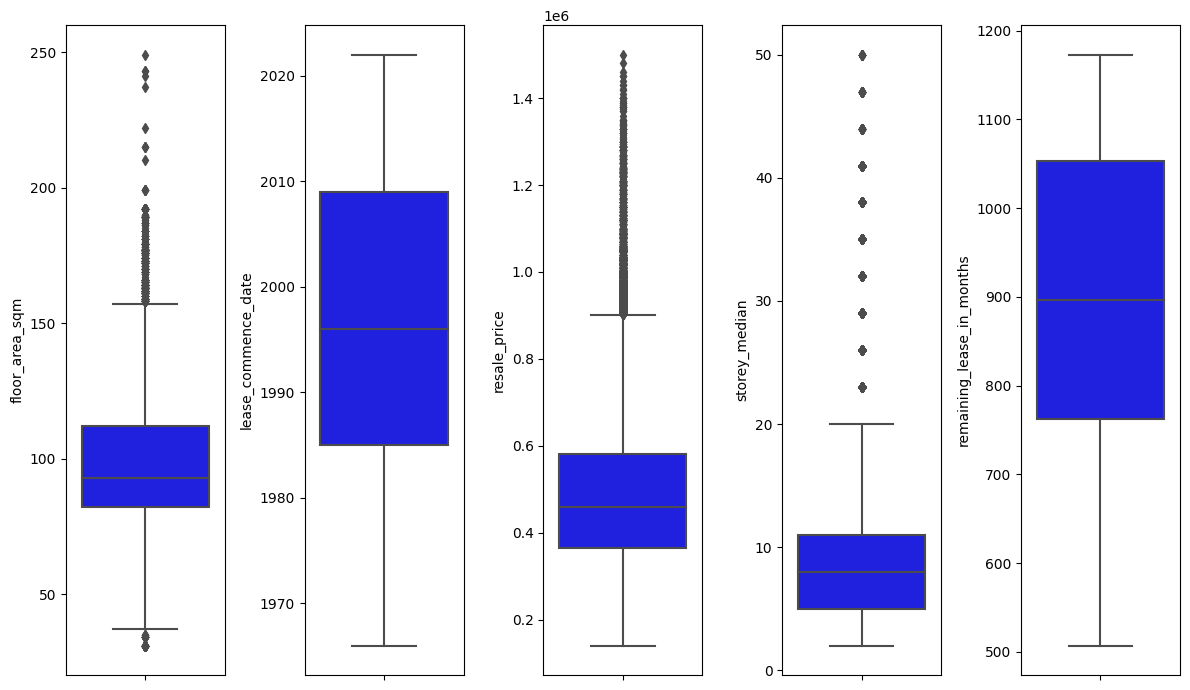

In [133]:
# For Numerical Columns

numericals = df[['floor_area_sqm', 'lease_commence_date', 'resale_price', 'storey_median', 'remaining_lease_in_months']]

features = numericals.columns
plt.figure(figsize=(12,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=numericals[features[i]], color='blue', orient='v')
  plt.tight_layout()

plt.show()

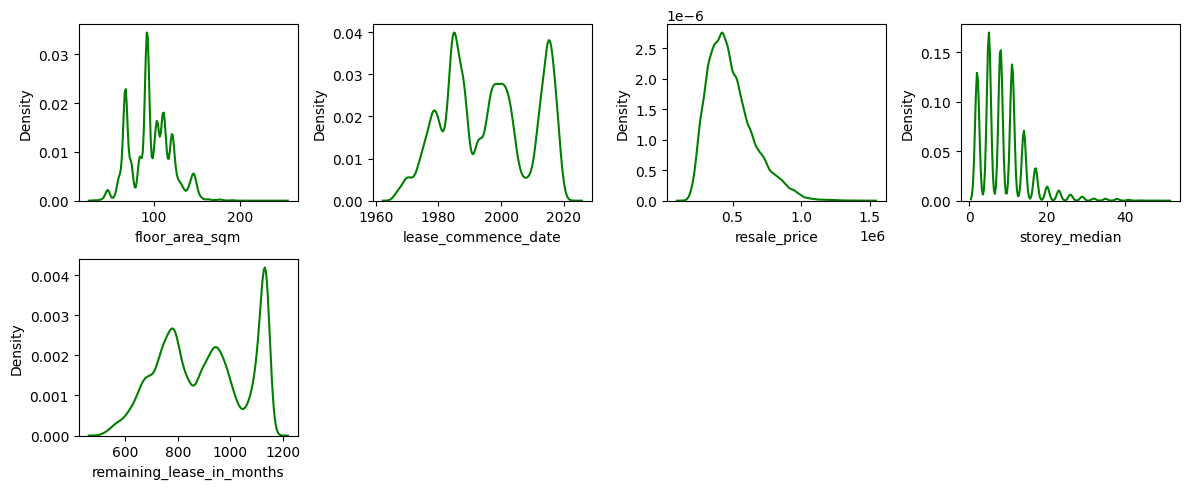

In [134]:
numericals = df[['floor_area_sqm', 'lease_commence_date', 'resale_price', 'storey_median', 'remaining_lease_in_months']]

features = numericals.columns

plt.figure(figsize=(12,5))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

plt.show()

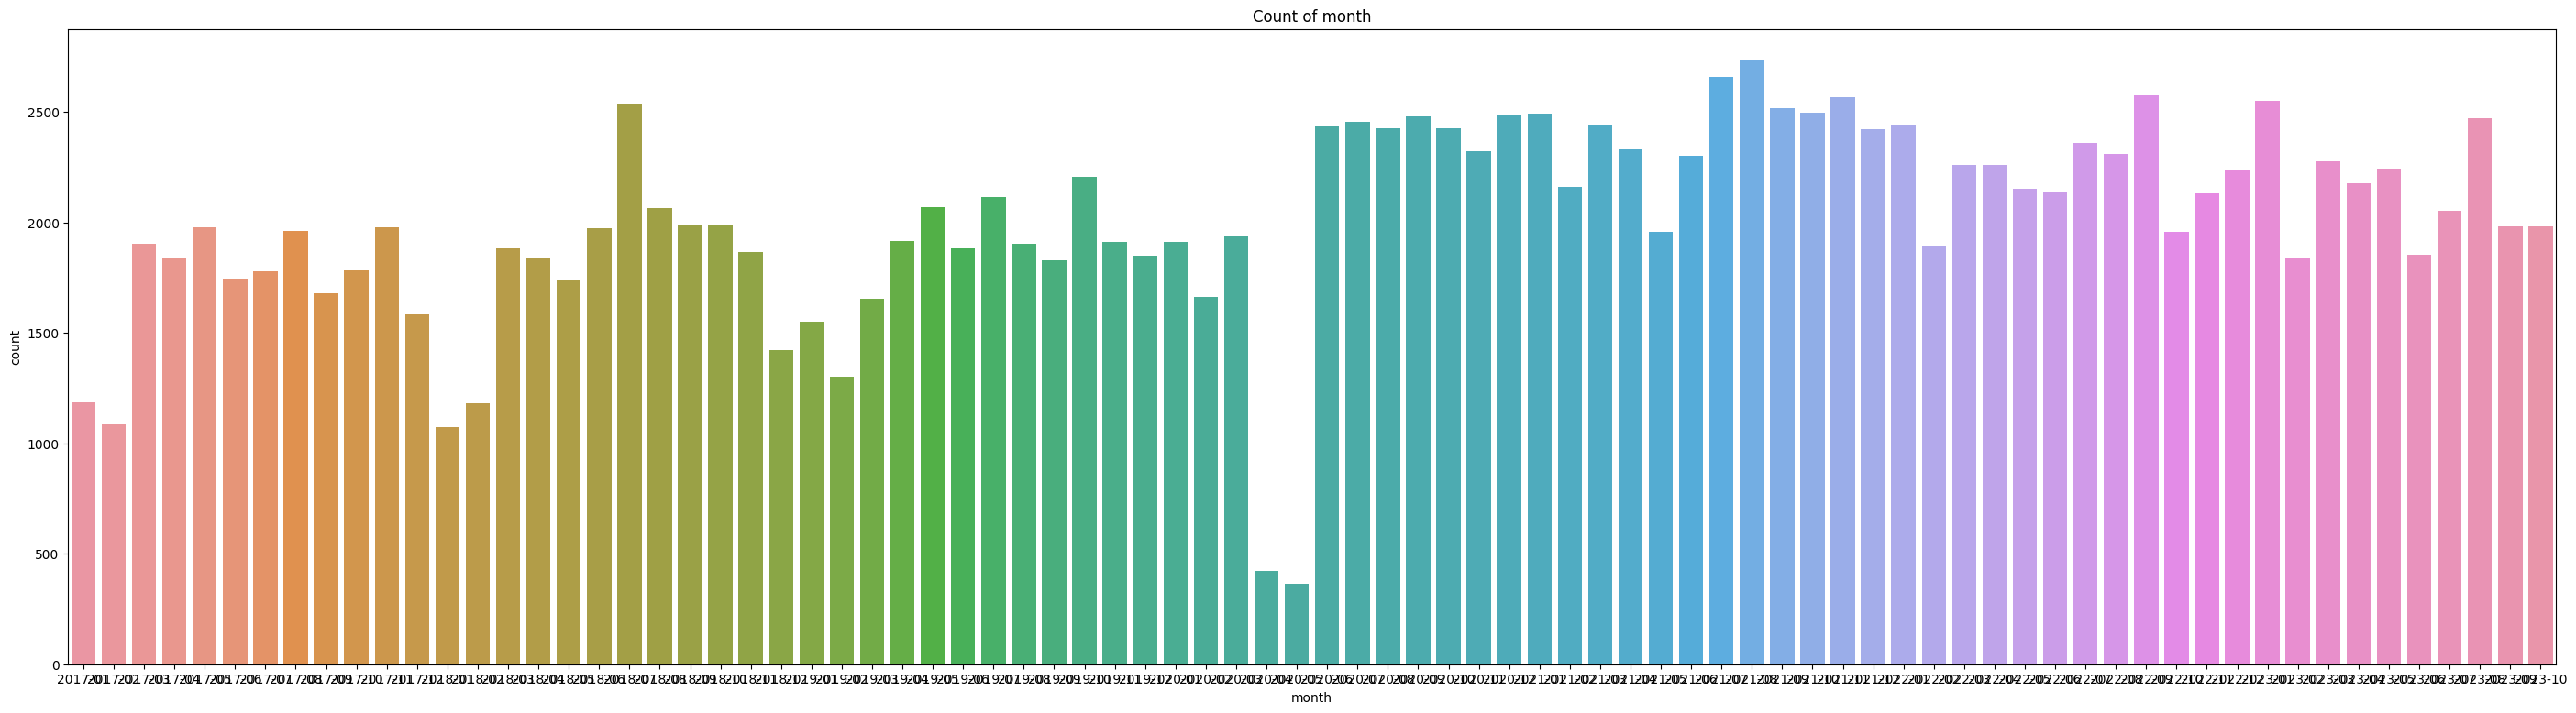

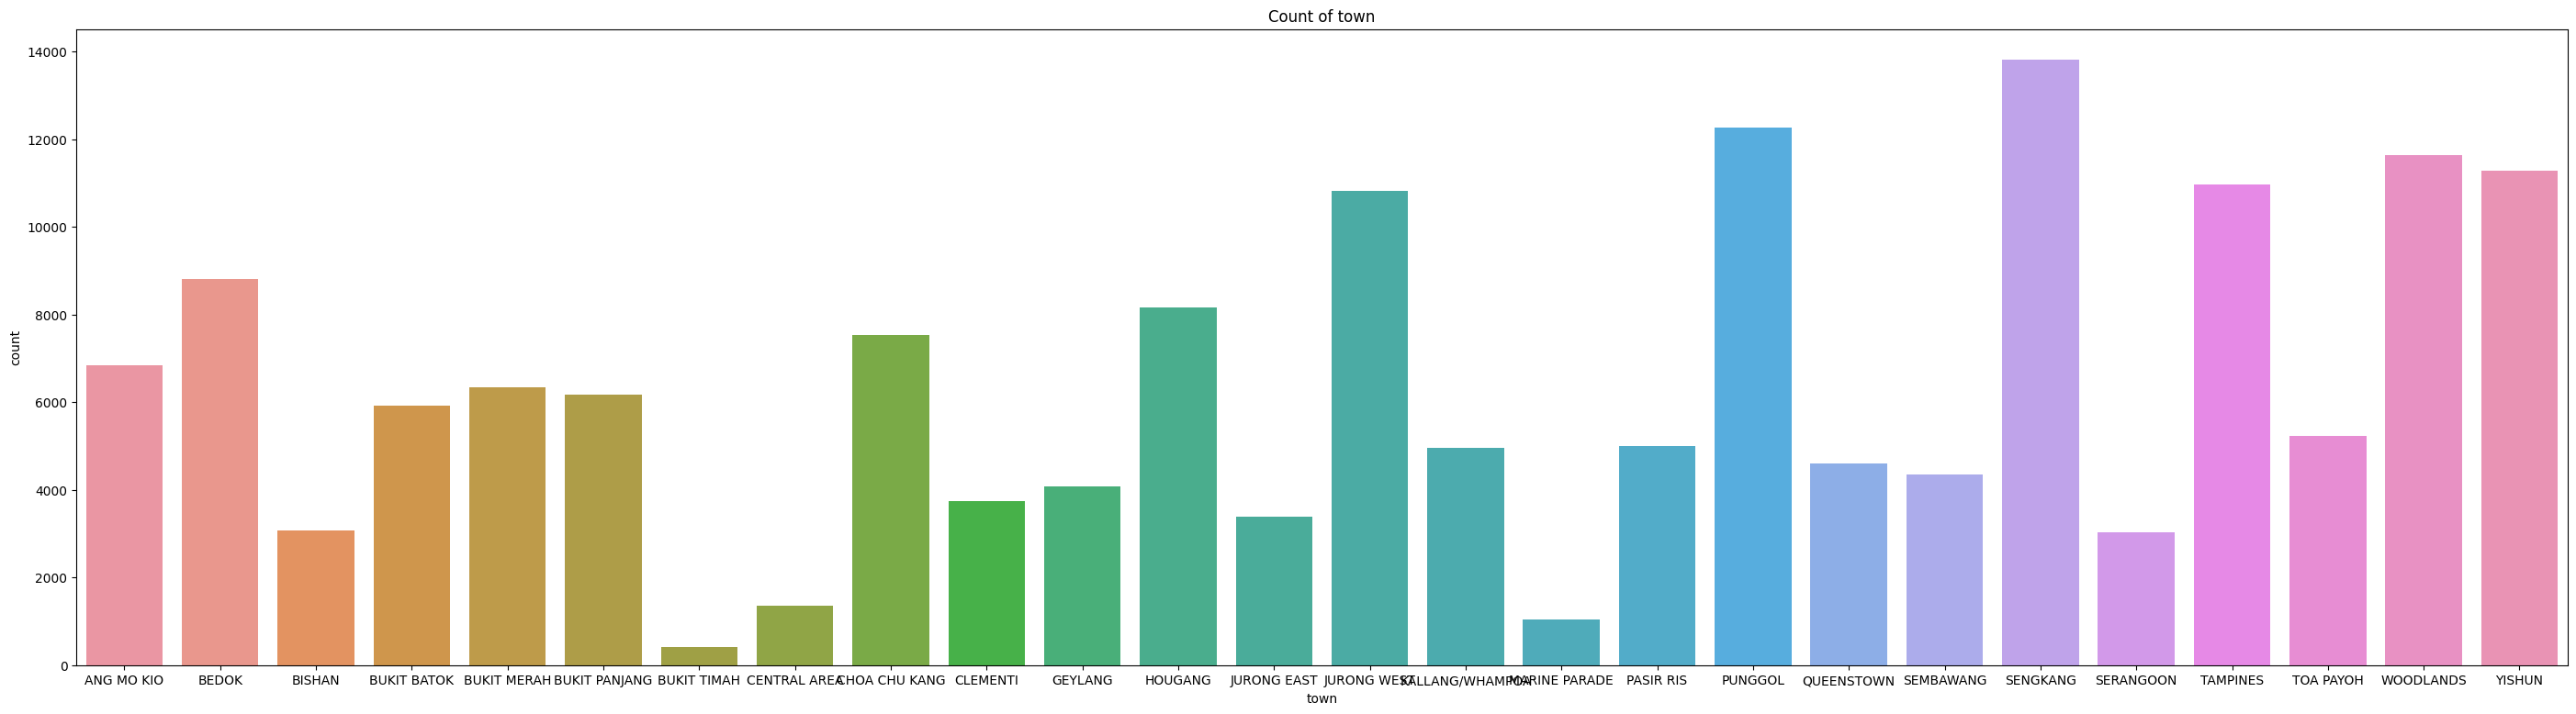

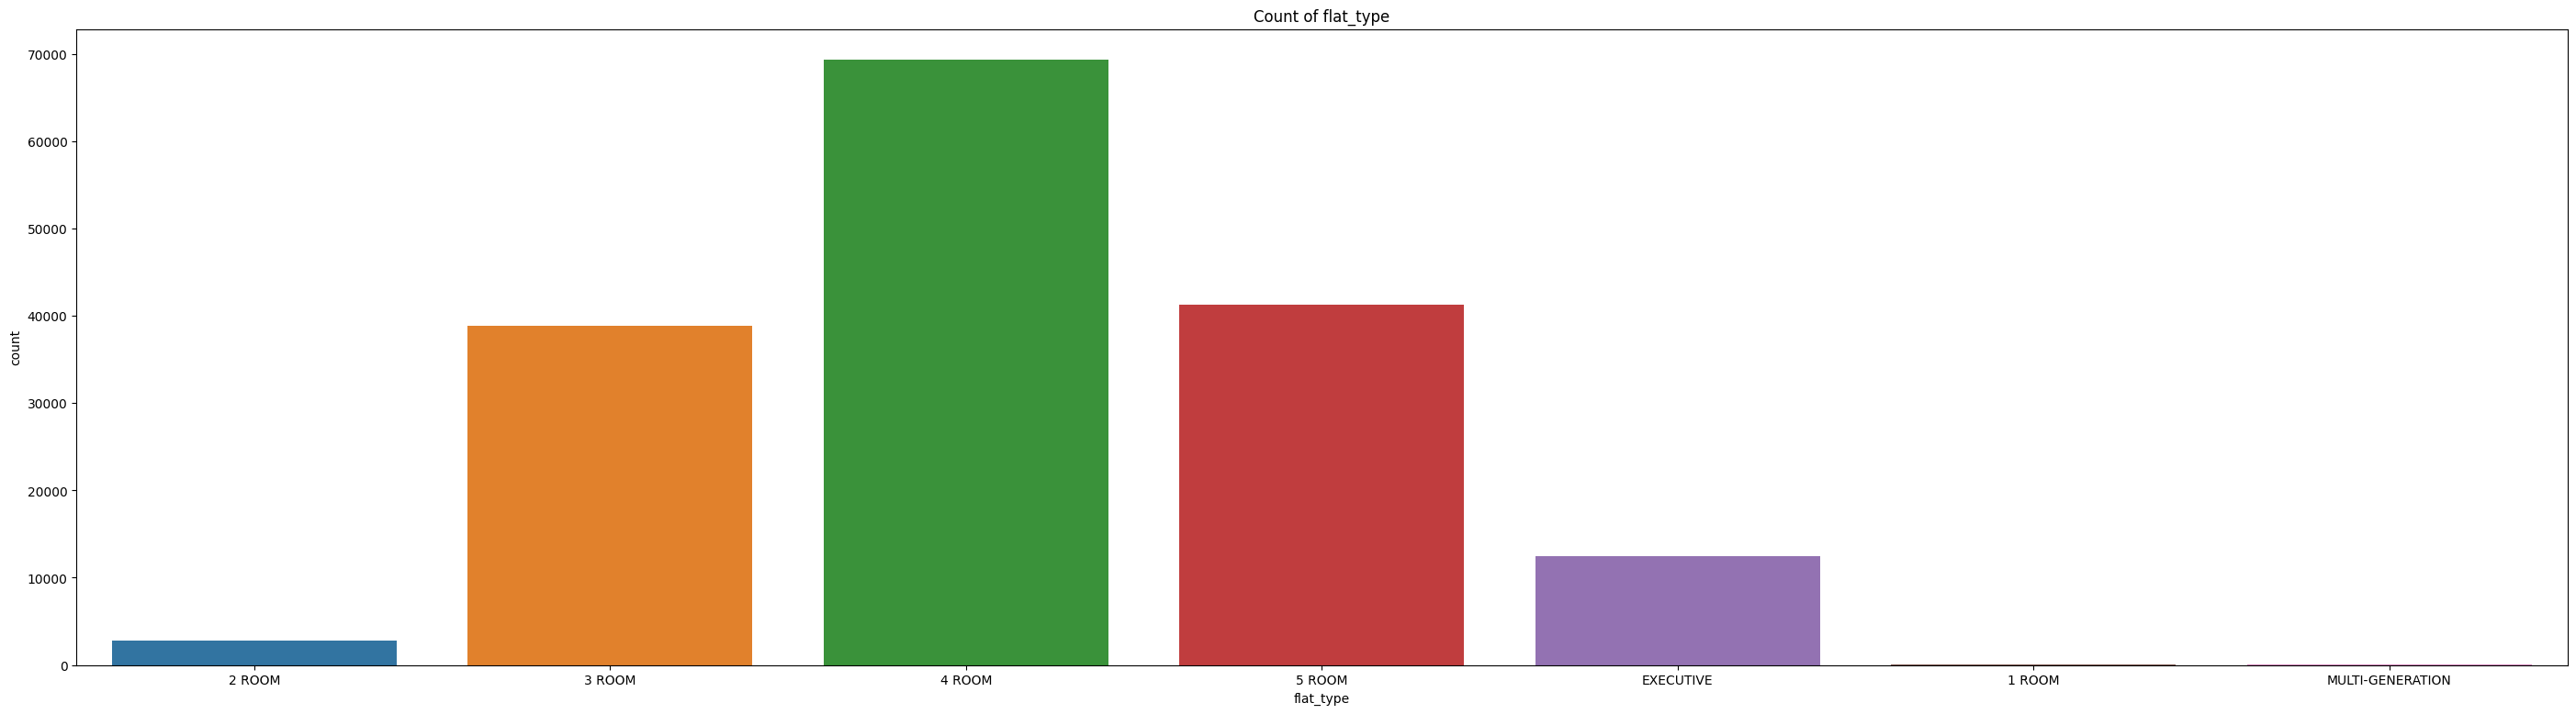

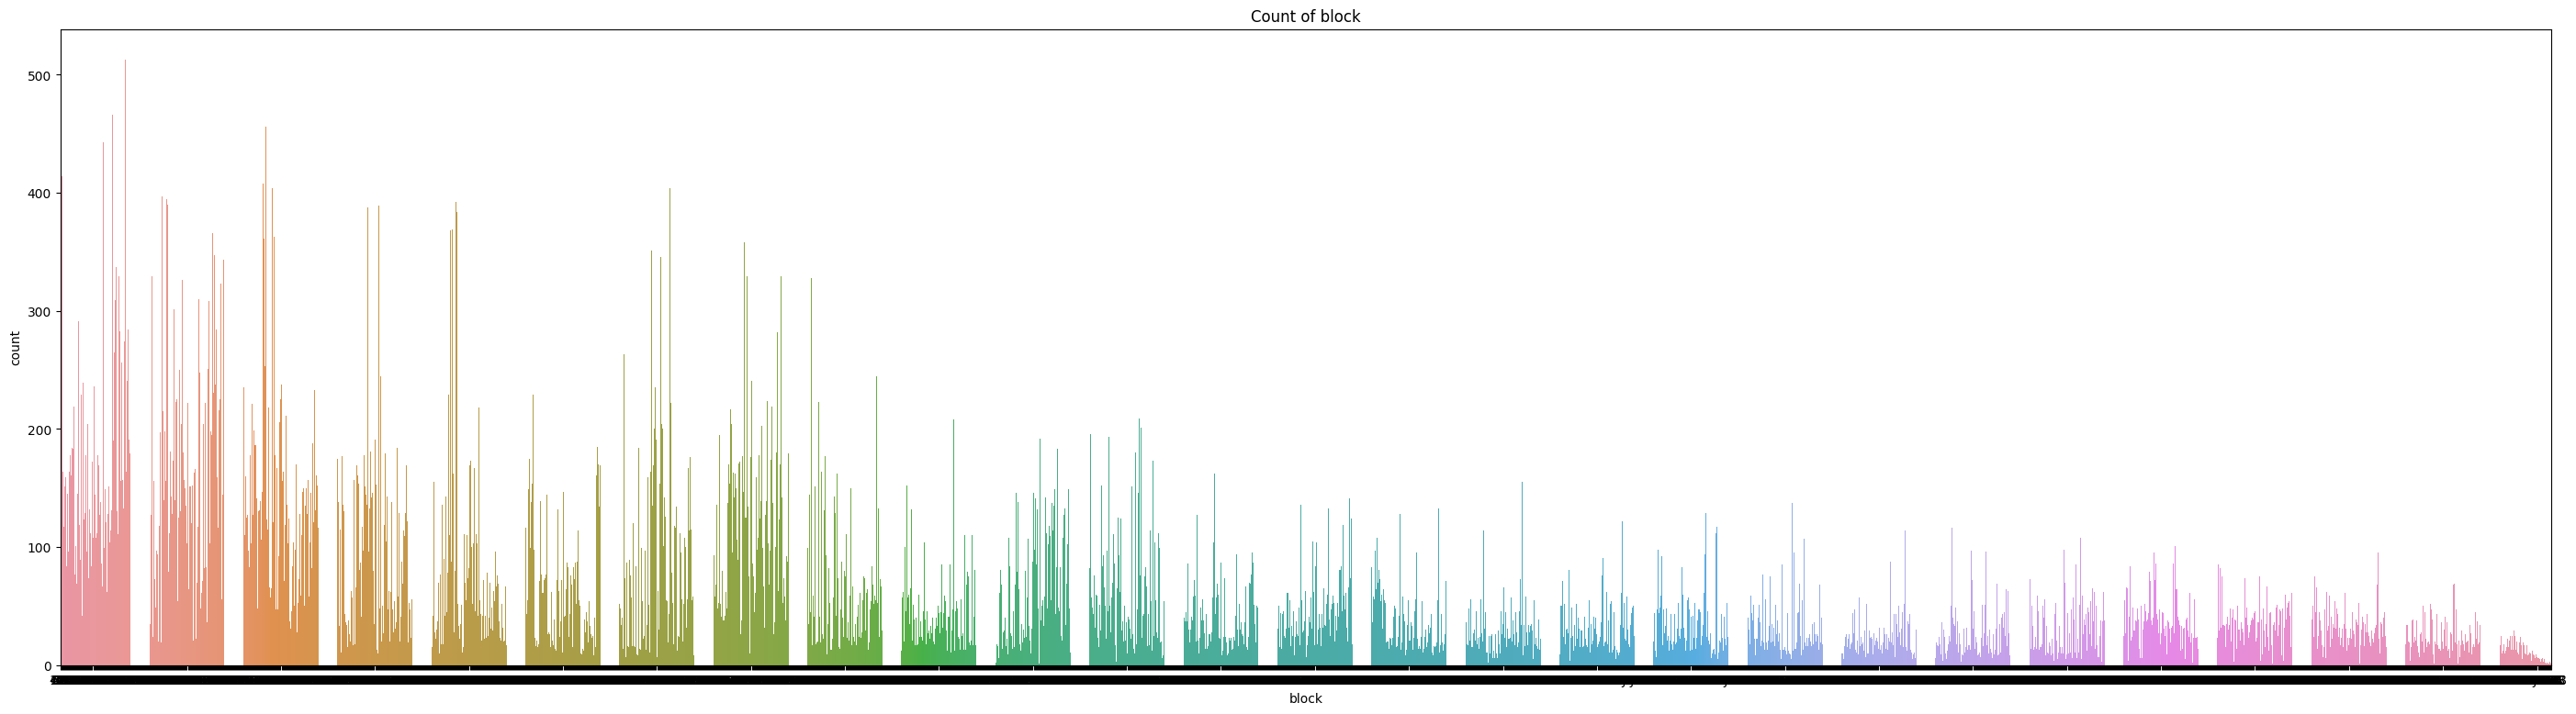

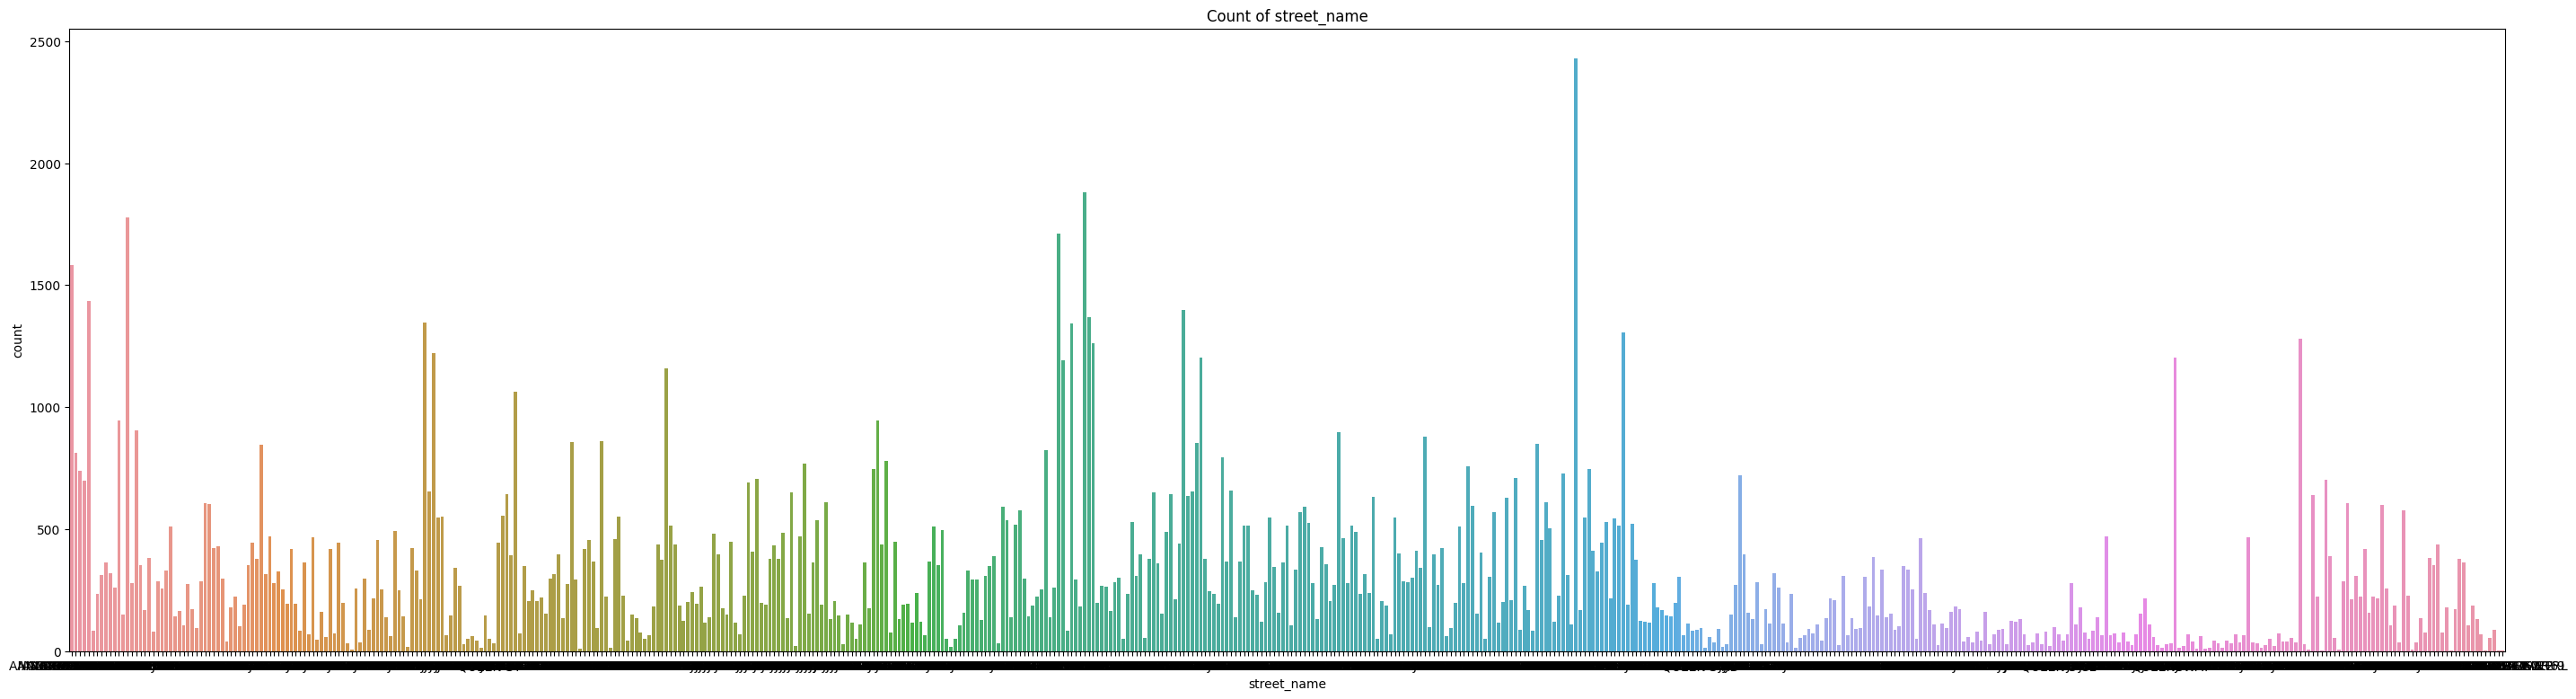

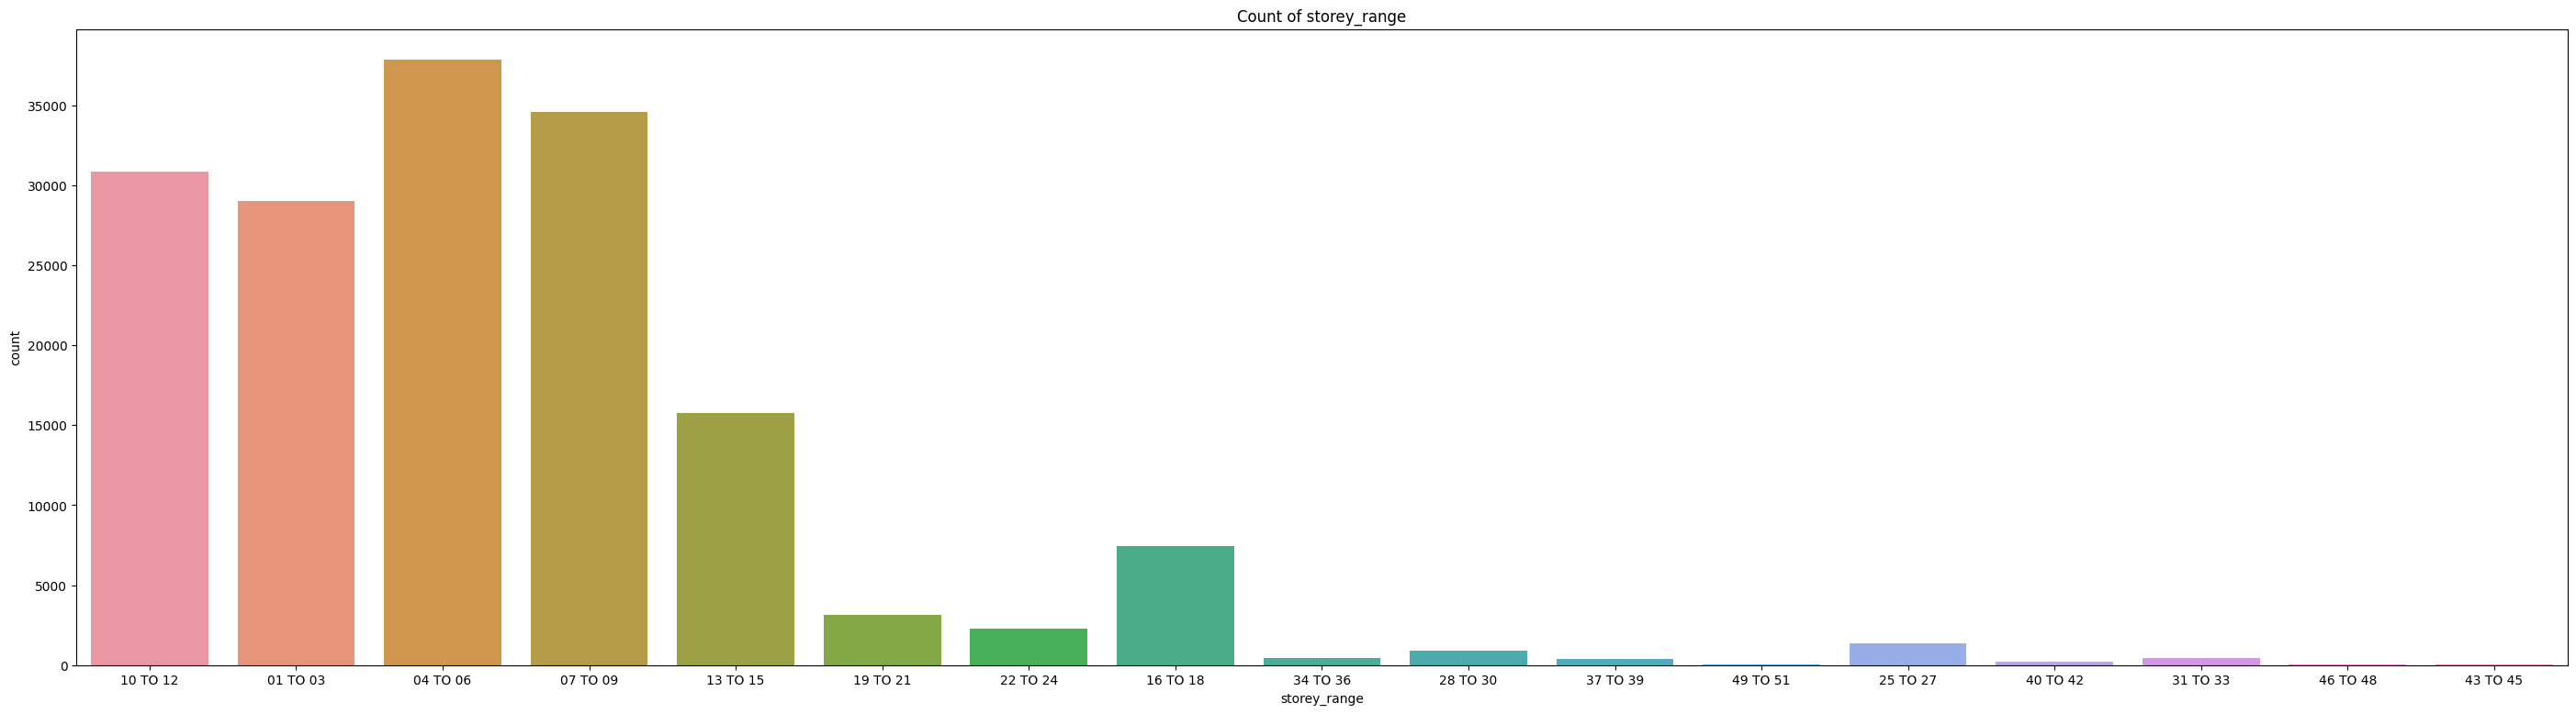

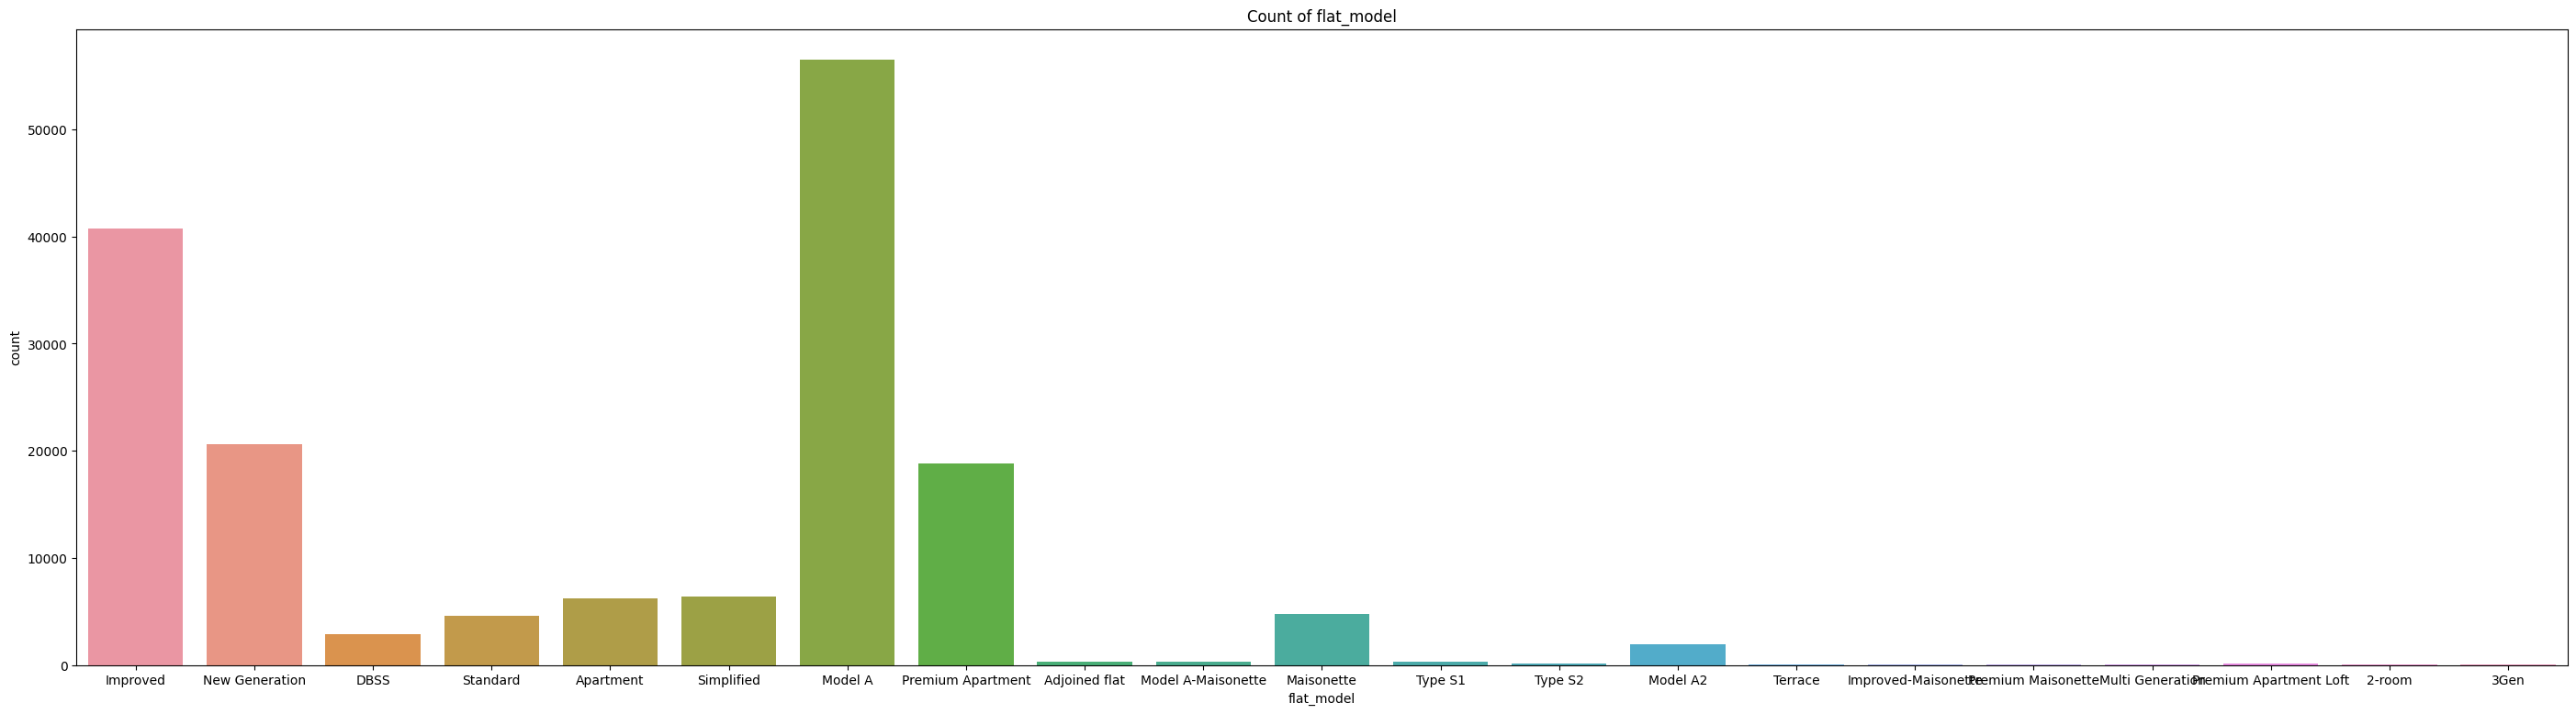

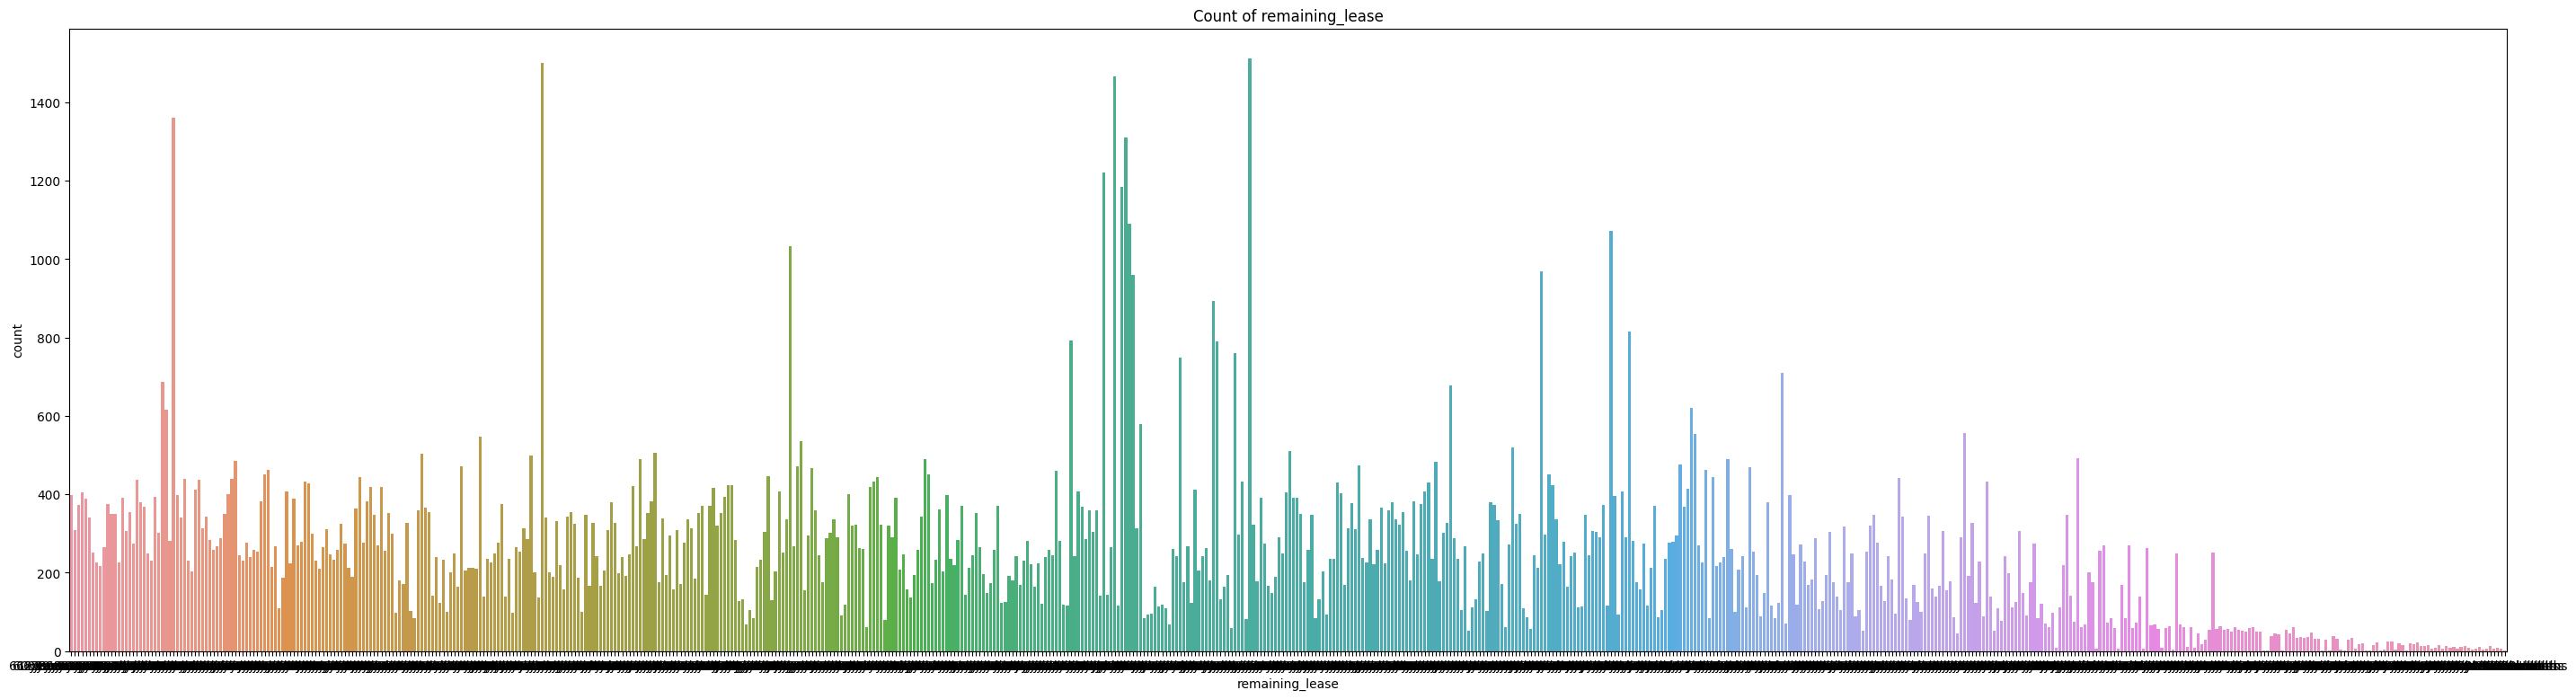

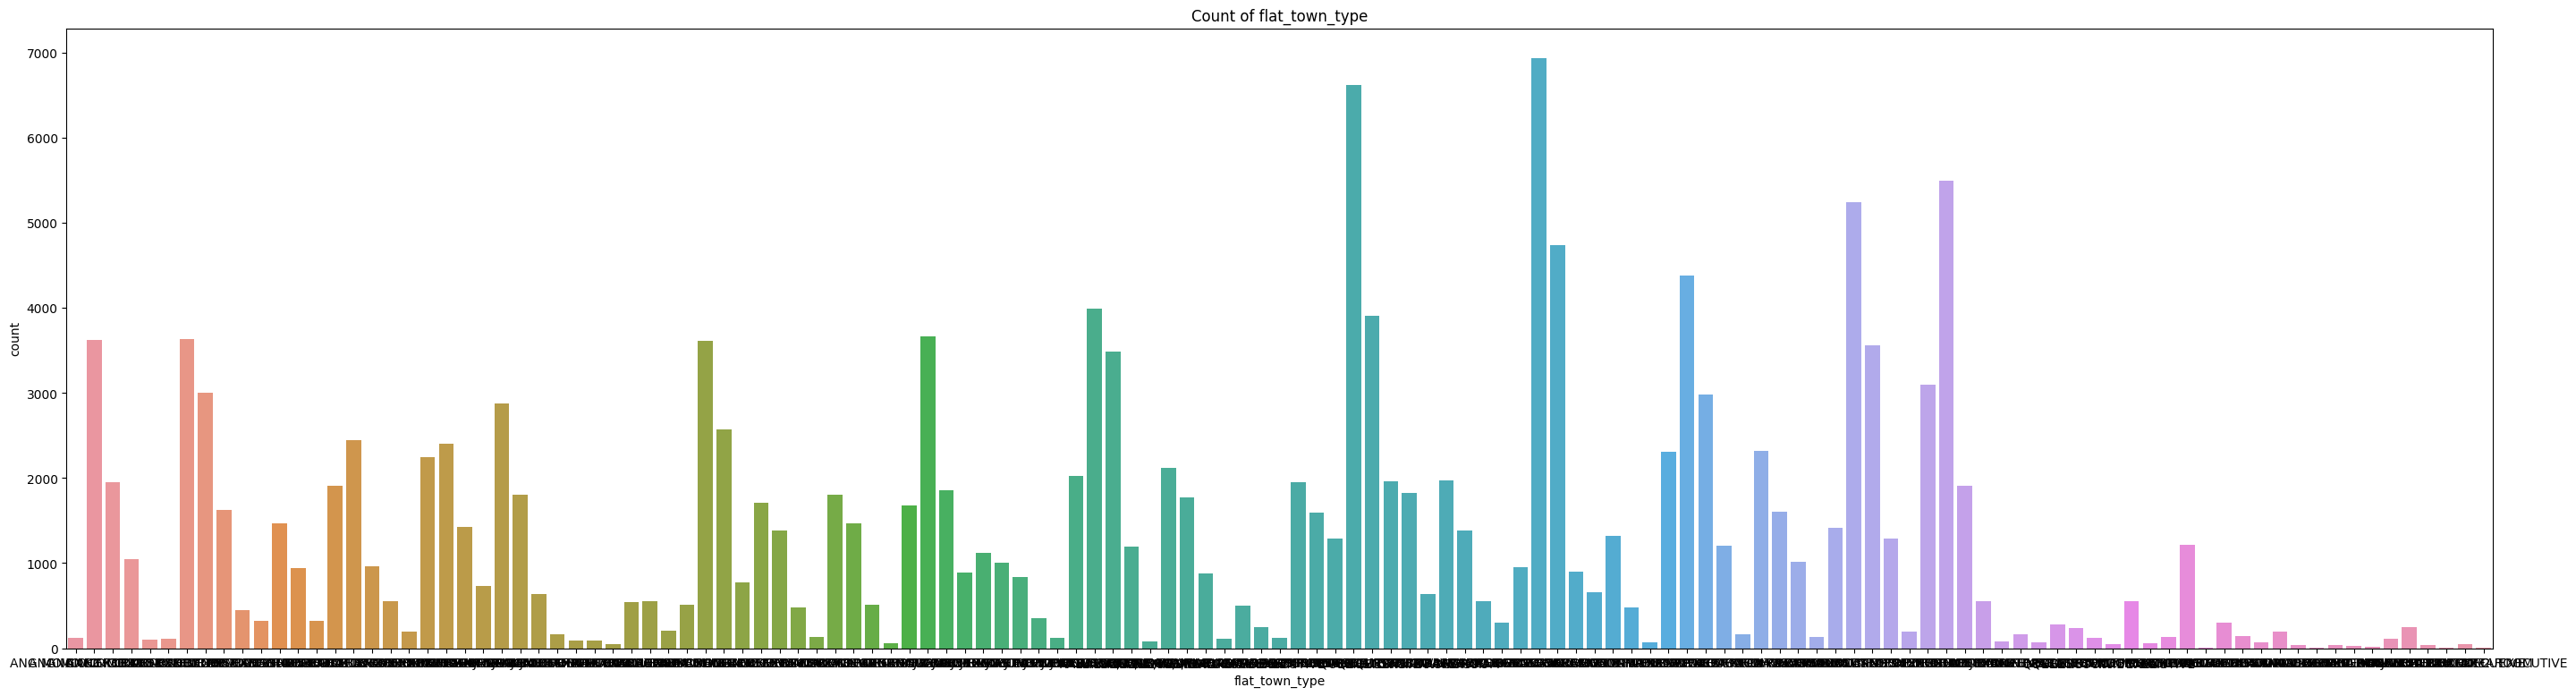

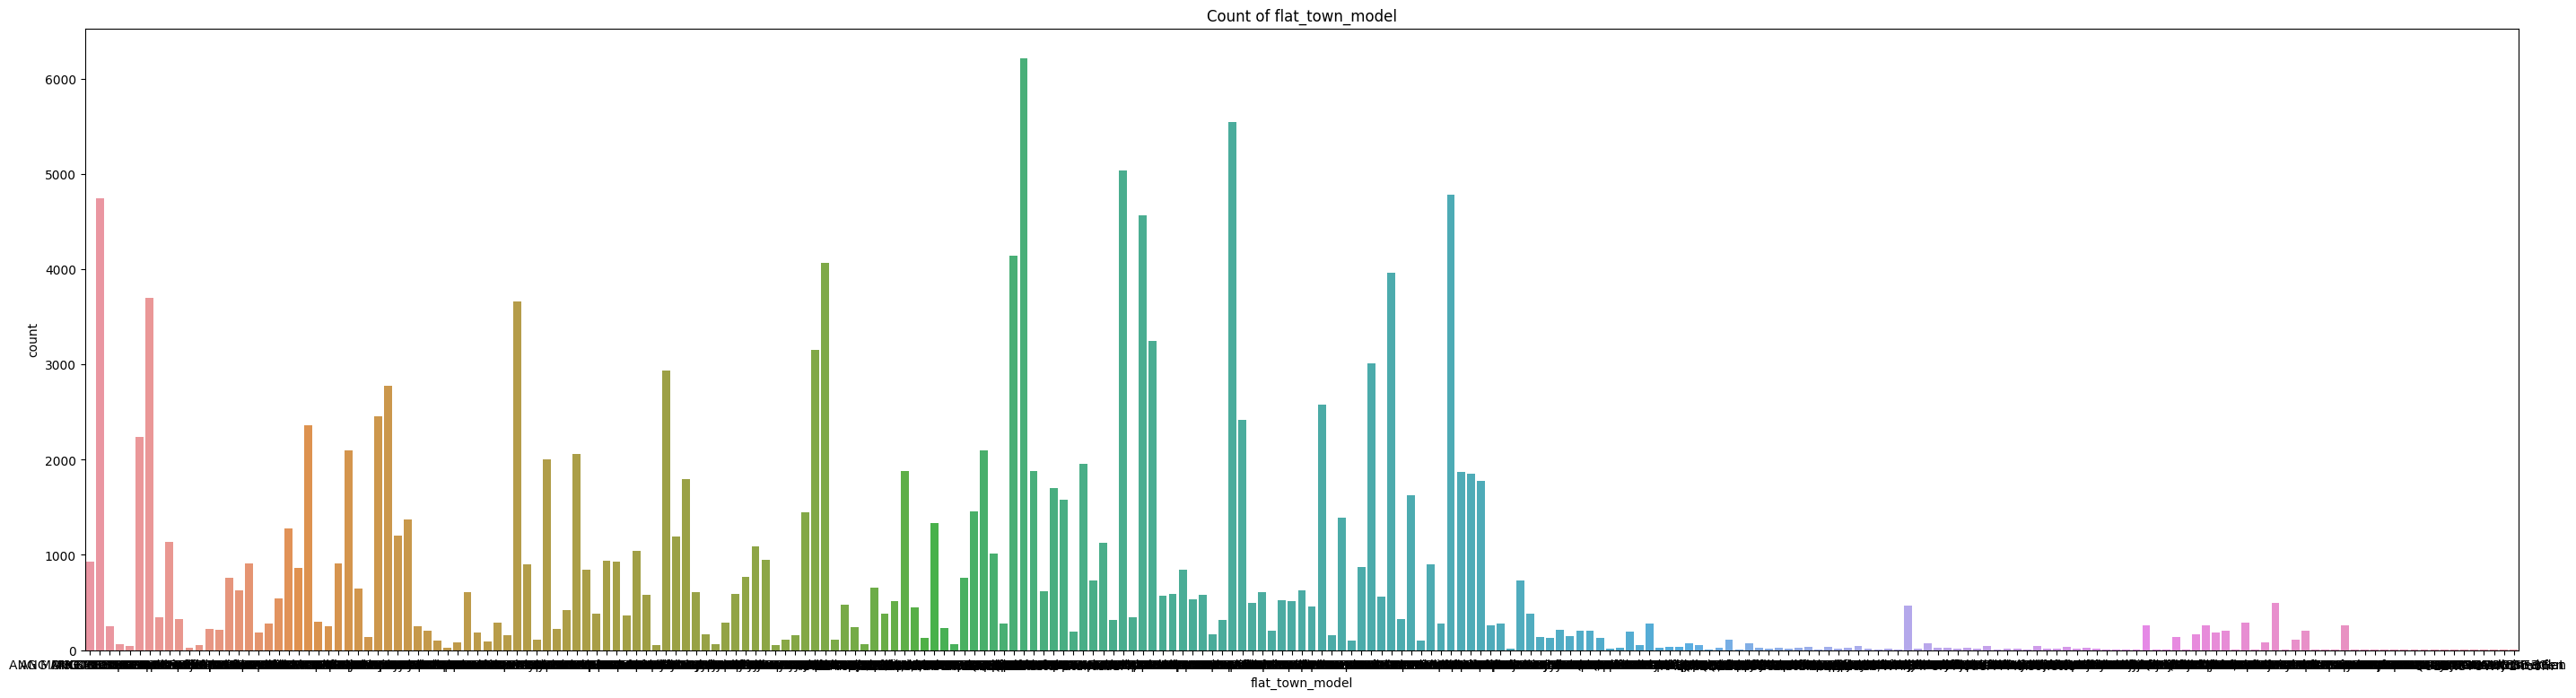

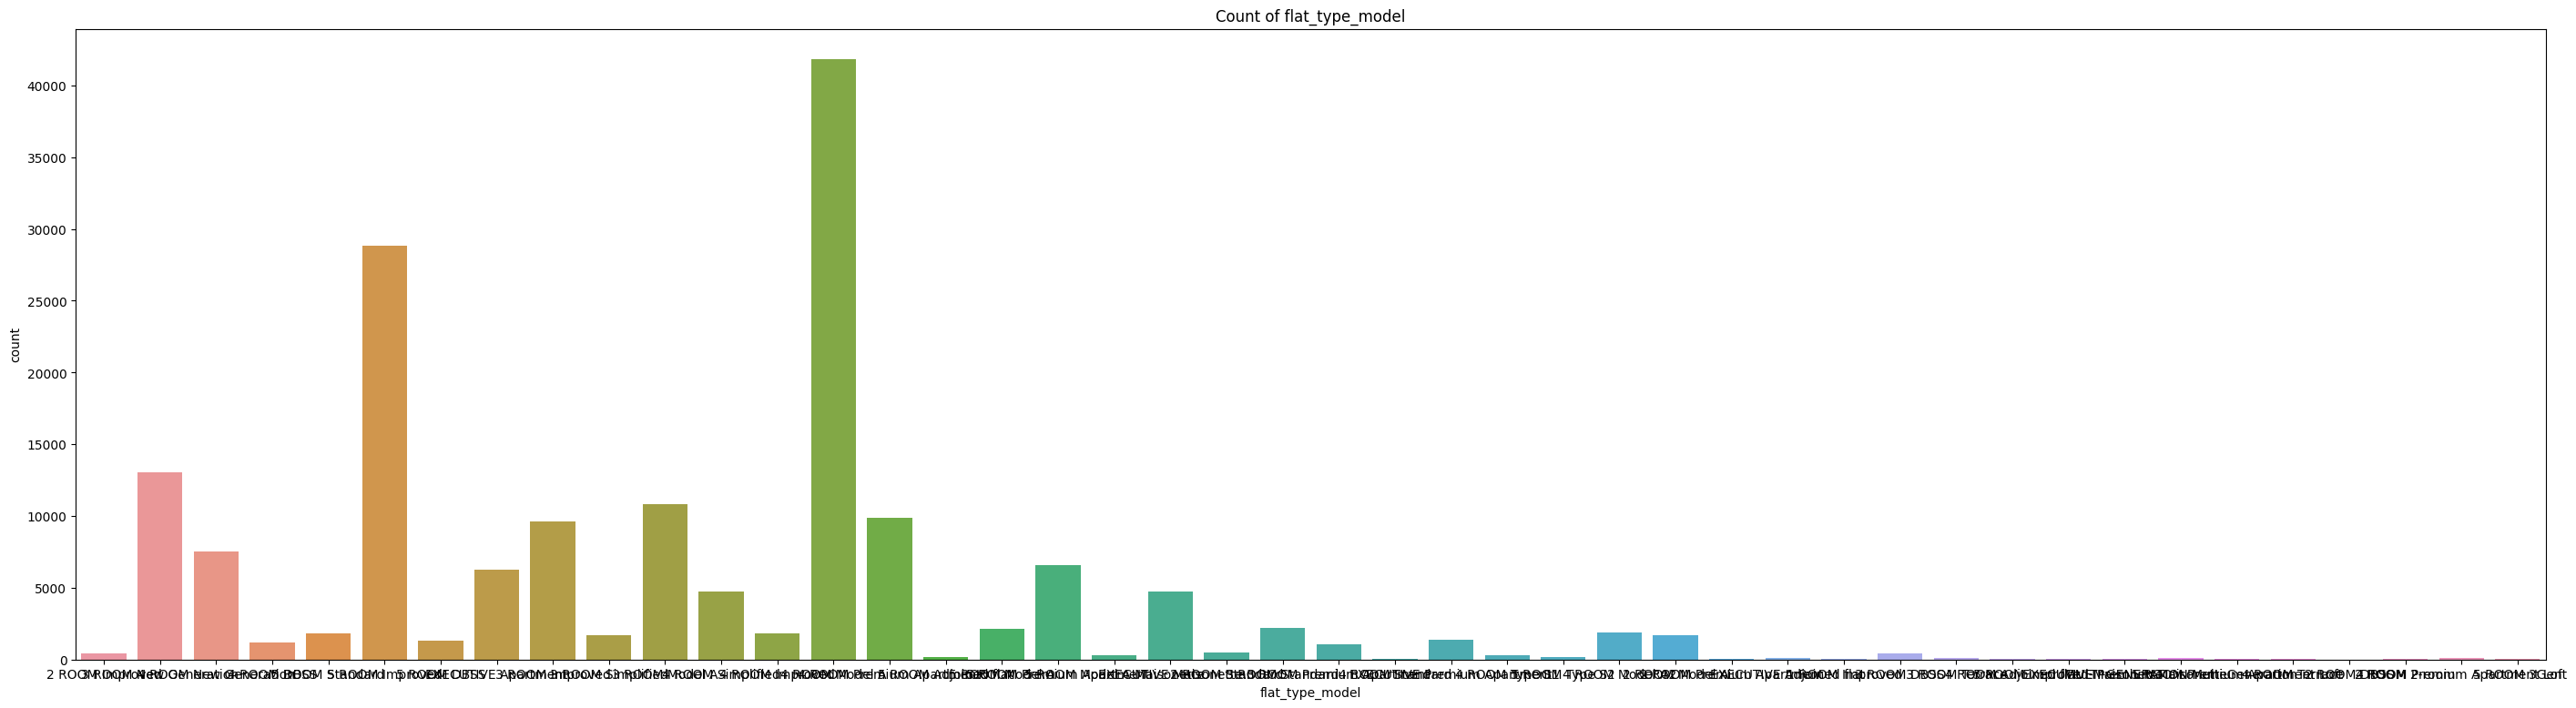

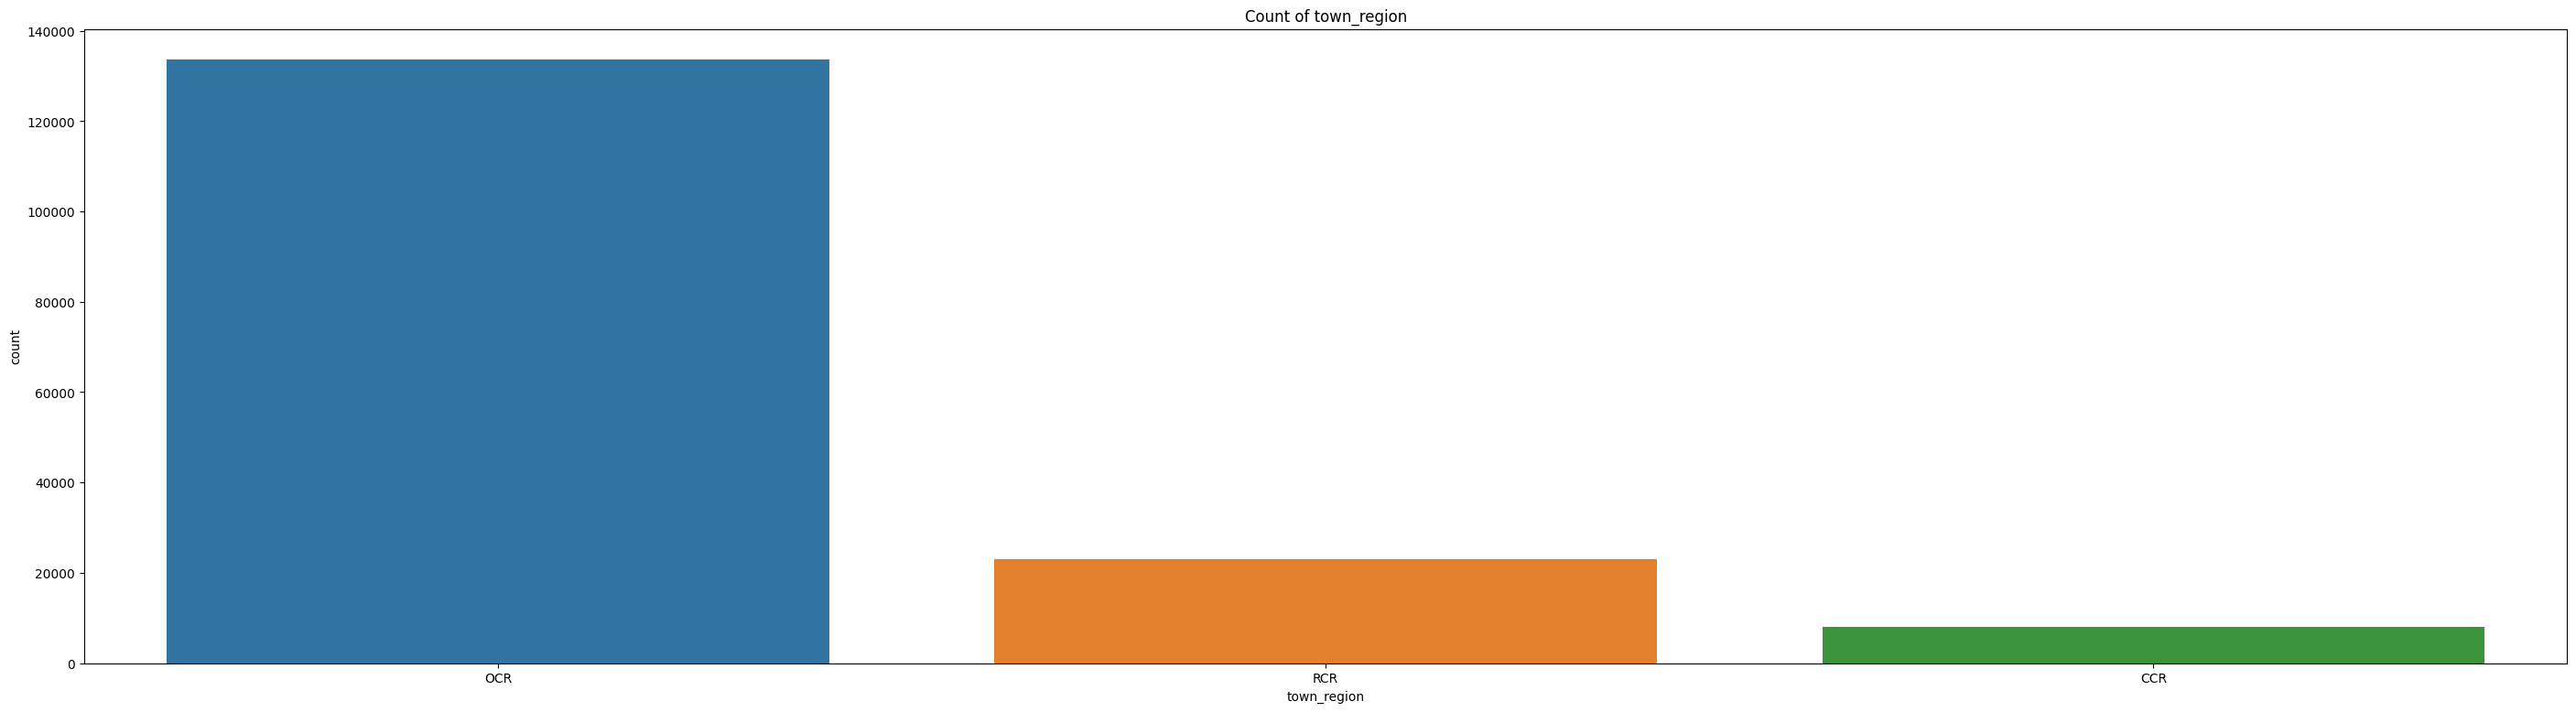

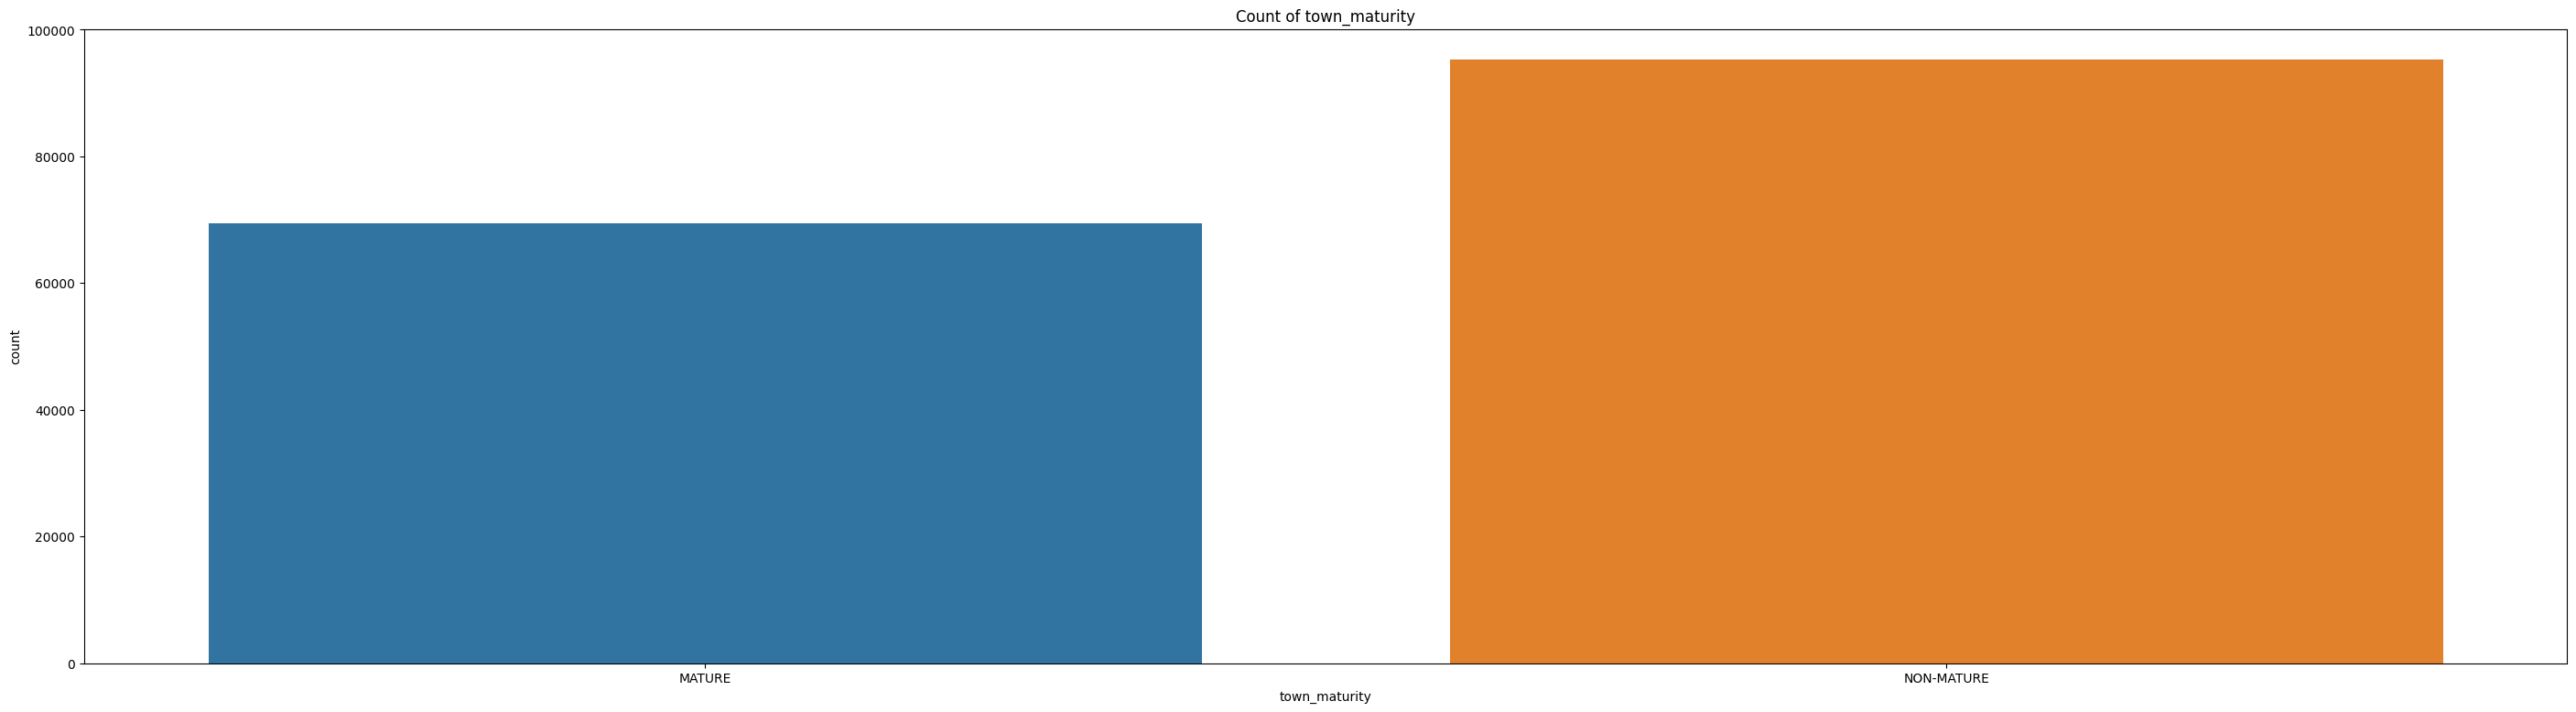

In [135]:
# For Categorical Columns

for col in df.select_dtypes(include=['object']):
  plt.figure(figsize=(35, 9))
  sns.countplot(data=df, x=col)
  plt.title(f'Count of {col}')
  plt.show()

##**Multivariate Analysis**

###**Heatmap Correlation**

In [136]:
df.corr()

<ipython-input-136-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,floor_area_sqm,lease_commence_date,resale_price,storey_median,remaining_lease_in_months,encoded_flat_type,encoded_town_region,encoded_town_maturity
floor_area_sqm,1.000000,0.124875,0.604977,-0.012392,0.130836,0.952174,-0.174349,-0.135349
lease_commence_date,0.124875,1.000000,0.364629,0.277889,0.990349,0.190826,-0.208324,-0.414236
resale_price,0.604977,0.364629,1.000000,0.362202,0.328690,0.617615,0.246989,0.201928
storey_median,-0.012392,0.277889,0.362202,1.000000,0.276889,0.032052,0.181567,0.048934
remaining_lease_in_months,0.130836,0.990349,0.328690,0.276889,1.000000,0.196164,-0.210632,-0.415517
encoded_flat_type,0.952174,0.190826,0.617615,0.032052,0.196164,1.000000,-0.157535,-0.163434
encoded_town_region,-0.174349,-0.208324,0.246989,0.181567,-0.210632,-0.157535,1.000000,0.526725
encoded_town_maturity,-0.135349,-0.414236,0.201928,0.048934,-0.415517,-0.163434,0.526725,1.000000


<ipython-input-137-ce92c728cb00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


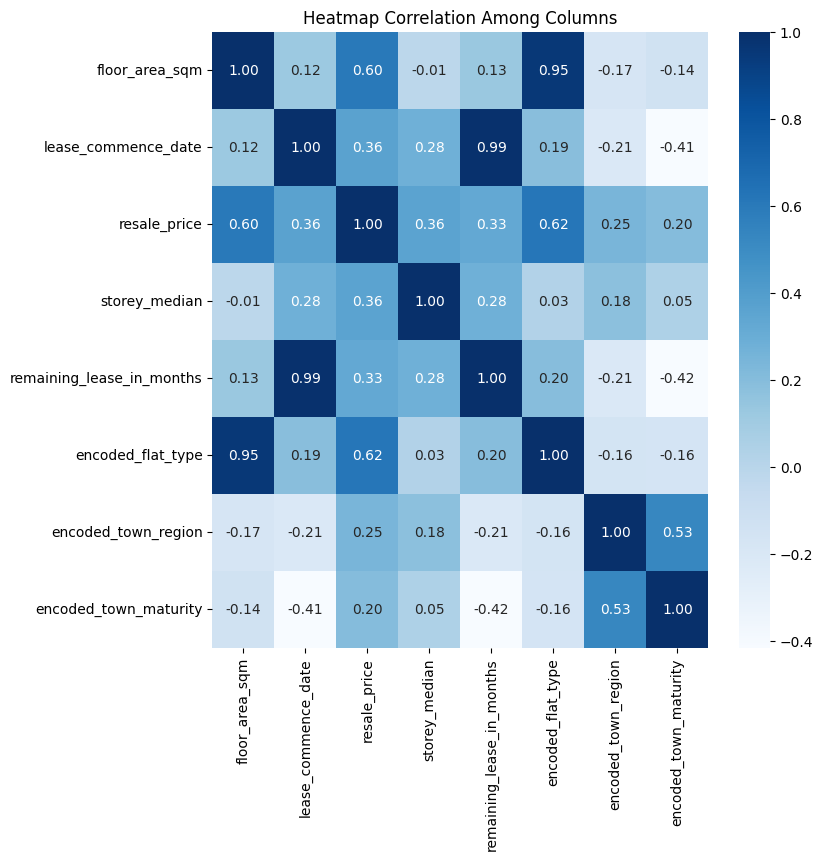

In [137]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title("Heatmap Correlation Among Columns")
plt.show()

The heatmap correlation shows that:
- "floor_area_sqm" and "encoded_flat_type" has 0.95 correlation value, which indicate too strong correlation whereas possible as double columns. Therefore, one of the column need to be dropped during modelling process (in this case "encoded_flat_type" will be dropped)

- Too strong correlation value also happen in "lease_commence_date" and "remaining_lease_in_months" with 0.99 value. Therefore, "lease_commence_date" column will be dropped for modelling

- "resale_price" has a correlation with:

  1.   "floor_area_sqm" | corr: 0.60
  2.   "storey_median" | corr: 0.36
  3.   "remaining_lease_in_months" | corr: 0.33
  4.   "encoded_town_region" | corr: 0.25
  5.   "encoded_town_maturity" | corr: 0.20

**Analysis of Location to resale_price**

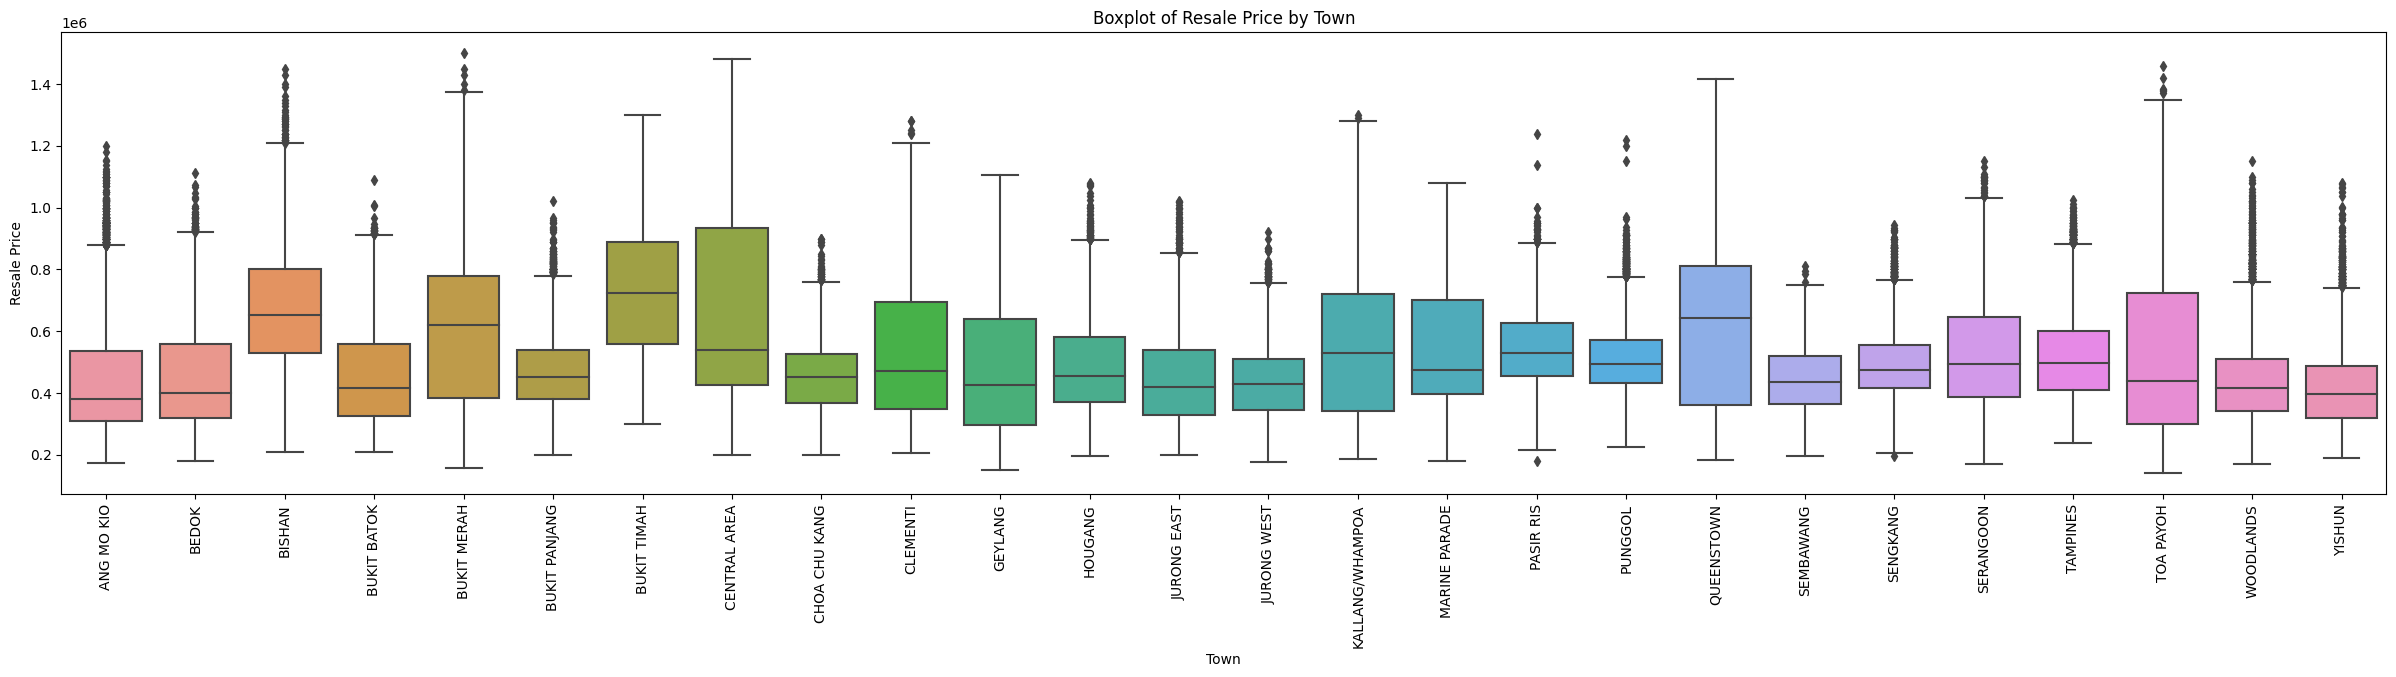

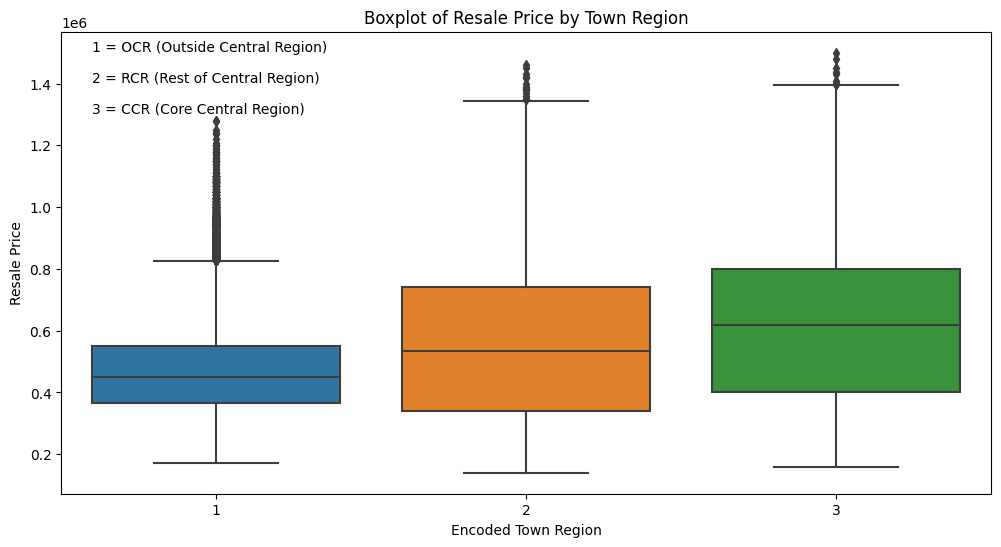

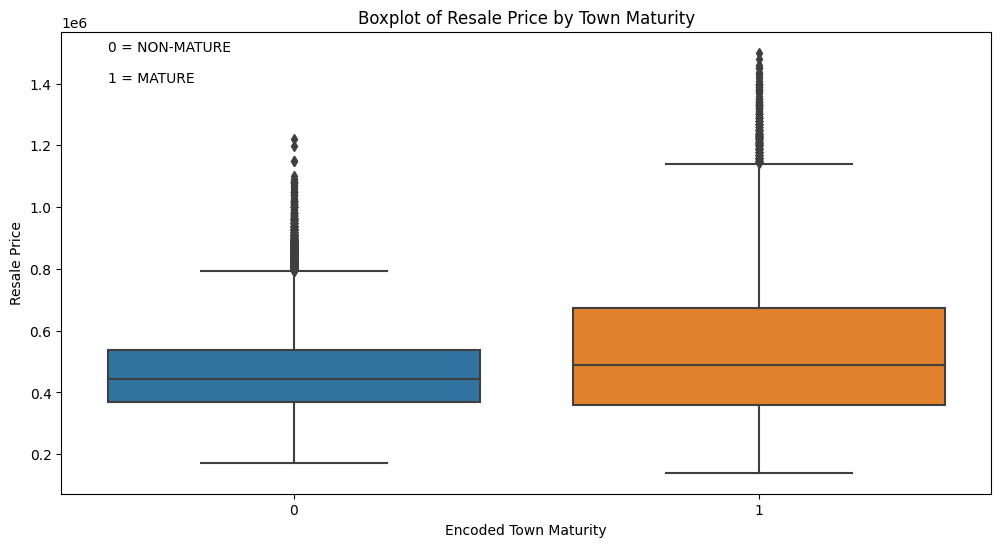

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot town with resale_price
plt.figure(figsize=(30, 6))
ax = sns.boxplot(data=df, x="town", y="resale_price")
plt.xlabel("Town")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Town")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Boxplot encoded_town_region with resale_price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="encoded_town_region", y="resale_price")
plt.xlabel("Encoded Town Region")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Town Region")

legend_labels = {1: 'OCR (Outside Central Region)', 2: 'RCR (Rest of Central Region)', 3: 'CCR (Core Central Region)'}
x_position =-0.4
y_position = df['resale_price'].max() + 5000
for label, description in legend_labels.items():
    plt.text(x_position, y_position, f"{label} = {description}", ha='left')
    y_position -= 100000

plt.show()

# Boxplot encoded_town_maturity with resale_price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="encoded_town_maturity", y="resale_price")
plt.xlabel("Encoded Town Maturity")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Town Maturity")

legend_labels = {0: 'NON-MATURE', 1: 'MATURE'}
x_position =-0.4
y_position = df['resale_price'].max() + 5000
for label, description in legend_labels.items():
    plt.text(x_position, y_position, f"{label} = {description}", ha='left')
    y_position -= 100000

plt.show()


**Highlight (by Flat Location)**
- Resale prices vary between different towns
- Among the market segments (CCR, RCR, and OCR), CCR towns have the highest median resale prices
- Mature towns tend to have higher average resale prices compared to non-mature towns


**Analysis of Flat Description to resale_price**

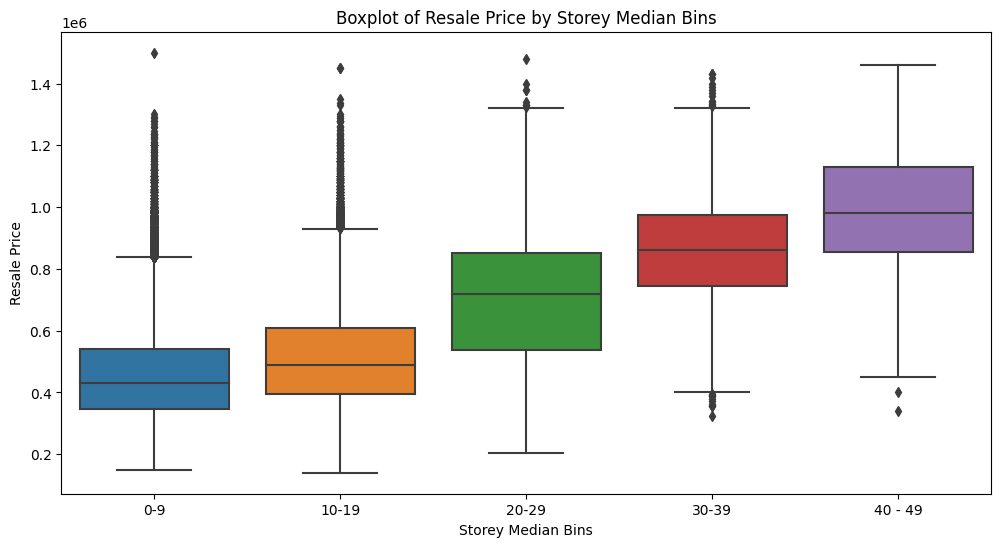

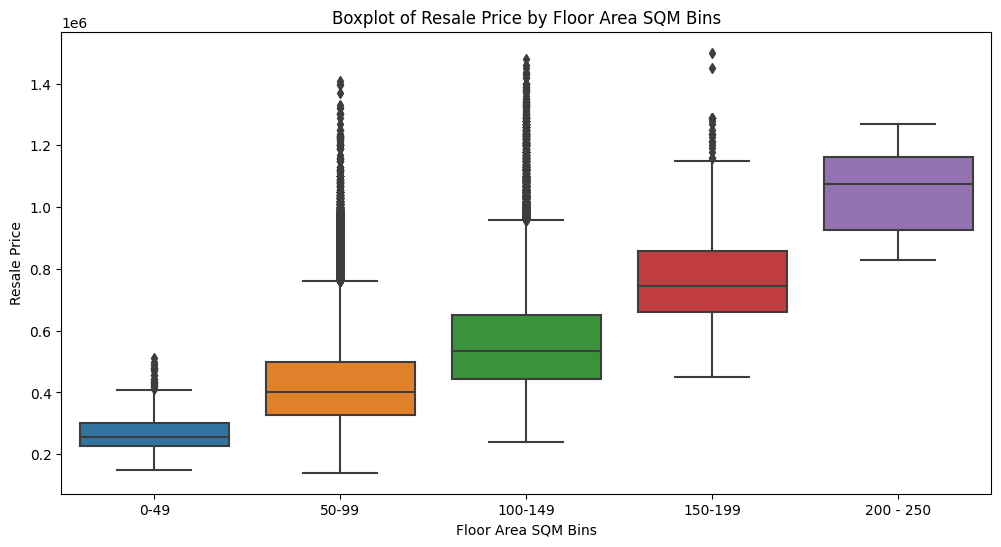

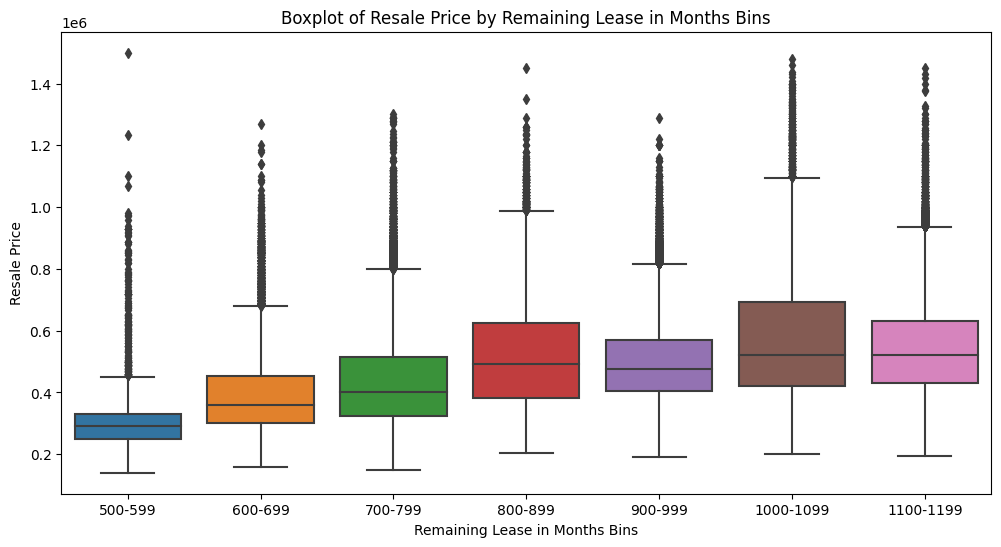

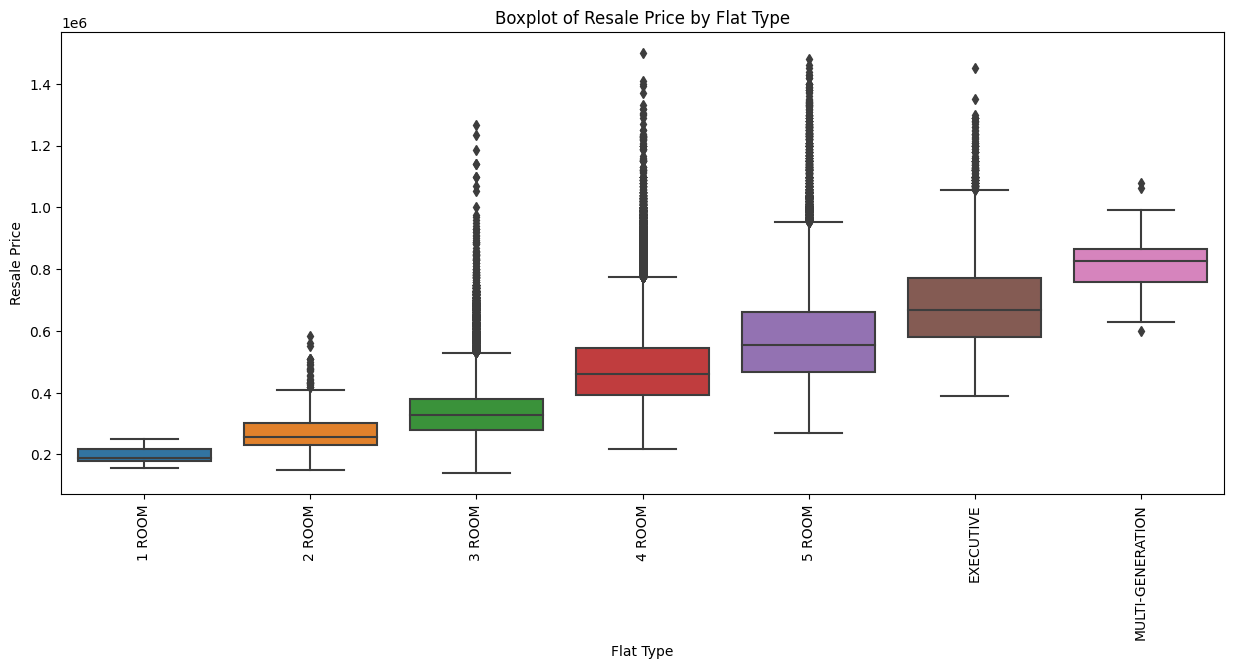

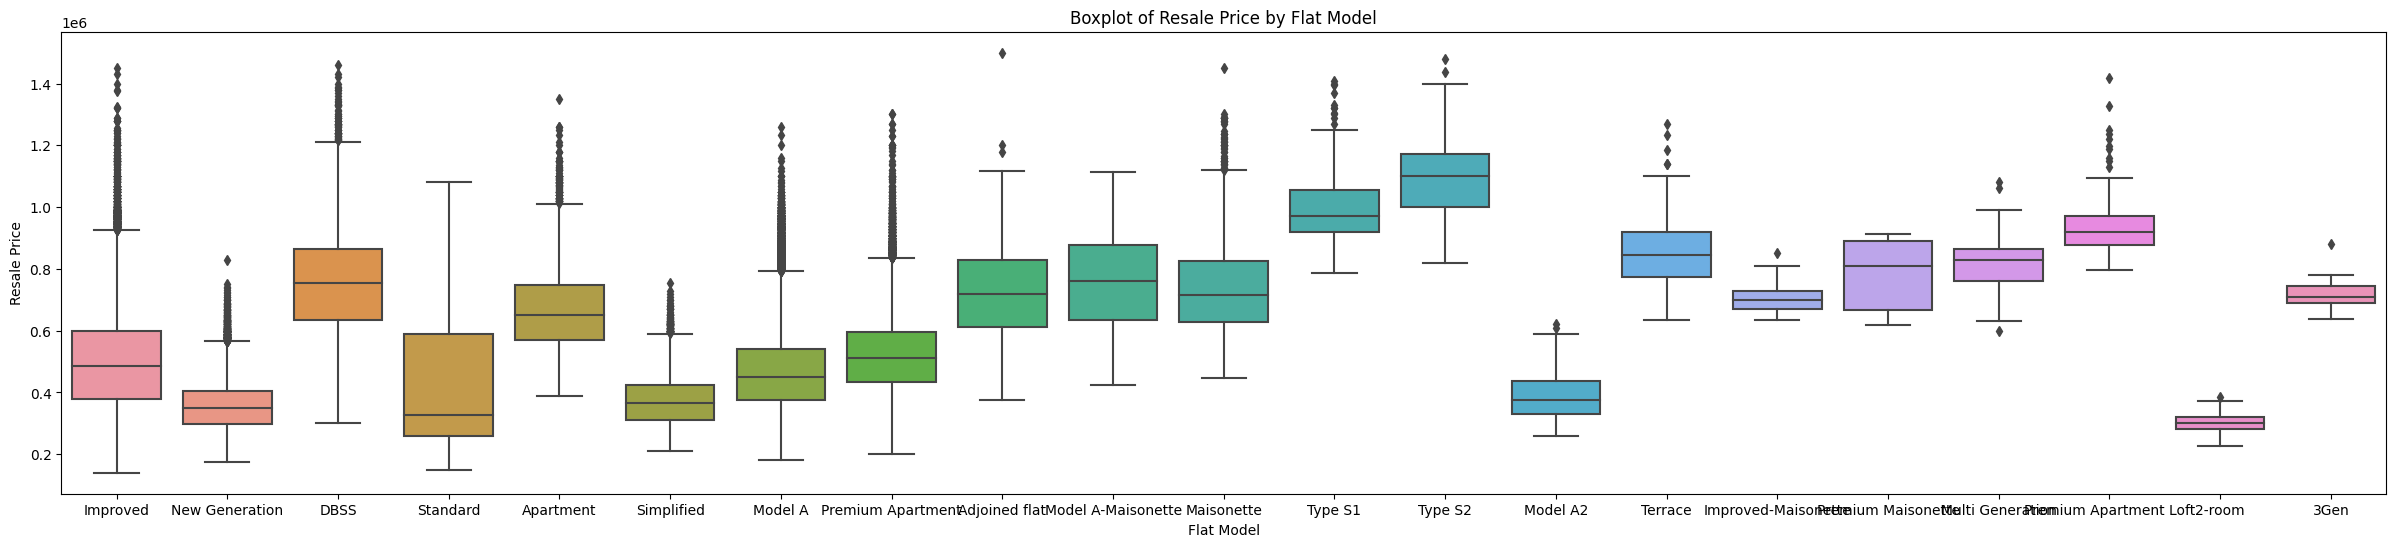

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boxplot storey_median with resale_price
bin_edges = [0, 10, 20, 30, 40, 50]
bin_labels = ["0-9", "10-19", "20-29", "30-39", "40 - 49"]

df['storey_median_bins'] = pd.cut(df['storey_median'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="storey_median_bins", y="resale_price")
plt.xlabel("Storey Median Bins")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Storey Median Bins")
plt.show()

# Boxplot floor_area_sqm with resale_price
bin_edges = [0, 50, 100, 150, 200, 250]
bin_labels = ["0-49", "50-99", "100-149", "150-199", "200 - 250"]

df['floor_area_sqm_bins'] = pd.cut(df['floor_area_sqm'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="floor_area_sqm_bins", y="resale_price")
plt.xlabel("Floor Area SQM Bins")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Floor Area SQM Bins")
plt.show()

# Boxplot remaining_lease_in_months with resale_price
bin_edges = [0, 600, 700, 800, 900, 1000, 1100, 1200]
bin_labels = ["500-599", "600-699", "700-799", "800-899", "900-999", "1000-1099", "1100-1199"]

df['remaining_lease_in_months_bins'] = pd.cut(df['remaining_lease_in_months'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="remaining_lease_in_months_bins", y="resale_price")
plt.xlabel("Remaining Lease in Months Bins")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Remaining Lease in Months Bins")
plt.show()

# Boxplot flat_type with resale_price
seq = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"]

plt.figure(figsize=(15, 6))
ax = sns.boxplot(data=df, x="flat_type", y="resale_price", order = seq)
plt.xlabel("Flat Type")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Flat Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Boxplot flat_model with resale_price
plt.figure(figsize=(30, 6))
sns.boxplot(data=df, x="flat_model", y="resale_price")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price")
plt.title("Boxplot of Resale Price by Flat Model")
plt.show()

**Highlight (by Flat Description)**
- Flat resale price also varies depending on their descriptions
- Price shows a positive correlation with flat floor area SQM, number of rooms, storey median, and remaining lease in months, while vary price variation for flat model


#**Machine Learning Model**

###**Column Selection for Modelling**

In [140]:
# Selecting necessary column
df_dropped = df[['town', 'flat_type', 'flat_model', 'flat_town_type', 'flat_town_model', 'flat_type_model',
                 'floor_area_sqm', 'remaining_lease_in_months', 'storey_median', 'encoded_town_region', 'encoded_town_maturity','resale_price']]
df_dropped.head()

,town,flat_type,flat_model,flat_town_type,flat_town_model,flat_type_model,floor_area_sqm,remaining_lease_in_months,storey_median,encoded_town_region,encoded_town_maturity,resale_price
0,ANG MO KIO,2 ROOM,Improved,ANG MO KIO 2 ROOM,ANG MO KIO Improved,2 ROOM Improved,44.0,736,11.0,1,1,232000.0
1,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,727,2.0,1,1,250000.0
2,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,749,2.0,1,1,262000.0
3,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,68.0,745,5.0,1,1,265000.0
4,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,749,2.0,1,1,265000.0


In [141]:
df_dropped.describe()

,floor_area_sqm,remaining_lease_in_months,storey_median,encoded_town_region,encoded_town_maturity,resale_price
count,164824.000000,164824.000000,164824.000000,164824.000000,164824.000000,1.648240e+05
mean,97.343703,896.457603,8.768620,1.237745,0.421571,4.886333e+05
std,24.029680,165.835480,5.948697,0.528710,0.493812,1.690606e+05
min,31.000000,507.000000,2.000000,1.000000,0.000000,1.400000e+05
25%,82.000000,762.000000,5.000000,1.000000,0.000000,3.650000e+05
50%,93.000000,896.000000,8.000000,1.000000,0.000000,4.588880e+05
75%,112.000000,1053.000000,11.000000,1.000000,1.000000,5.800000e+05
max,249.000000,1173.000000,50.000000,3.000000,1.000000,1.500000e+06


###**Segmentation - Kmeans Clustering**

In [142]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Features selection for clustering
X = df_dropped[['floor_area_sqm', 'remaining_lease_in_months', 'storey_median', 'encoded_town_region', 'encoded_town_maturity']]

# Number of clusters (K)
k = 3

# Create a K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the model to data and assign cluster labels
df_dropped['cluster'] = kmeans.fit_predict(X)
df_dropped

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-142-aea423643c1b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['cluster'] = kmeans.fit_predict(X)


,town,flat_type,flat_model,flat_town_type,flat_town_model,flat_type_model,floor_area_sqm,remaining_lease_in_months,storey_median,encoded_town_region,encoded_town_maturity,resale_price,cluster
0,ANG MO KIO,2 ROOM,Improved,ANG MO KIO 2 ROOM,ANG MO KIO Improved,2 ROOM Improved,44.0,736,11.0,1,1,232000.0,0
1,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,727,2.0,1,1,250000.0,0
2,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,749,2.0,1,1,262000.0,0
3,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,68.0,745,5.0,1,1,265000.0,0
4,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,749,2.0,1,1,265000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164819,YISHUN,5 ROOM,Improved,YISHUN 5 ROOM,YISHUN Improved,5 ROOM Improved,112.0,1093,14.0,1,0,670000.0,1
164820,YISHUN,EXECUTIVE,Maisonette,YISHUN EXECUTIVE,YISHUN Maisonette,EXECUTIVE Maisonette,148.0,767,8.0,1,0,830000.0,0
164821,YISHUN,EXECUTIVE,Apartment,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,142.0,764,5.0,1,0,753000.0,0
164822,YISHUN,EXECUTIVE,Apartment,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,142.0,756,11.0,1,0,808000.0,0


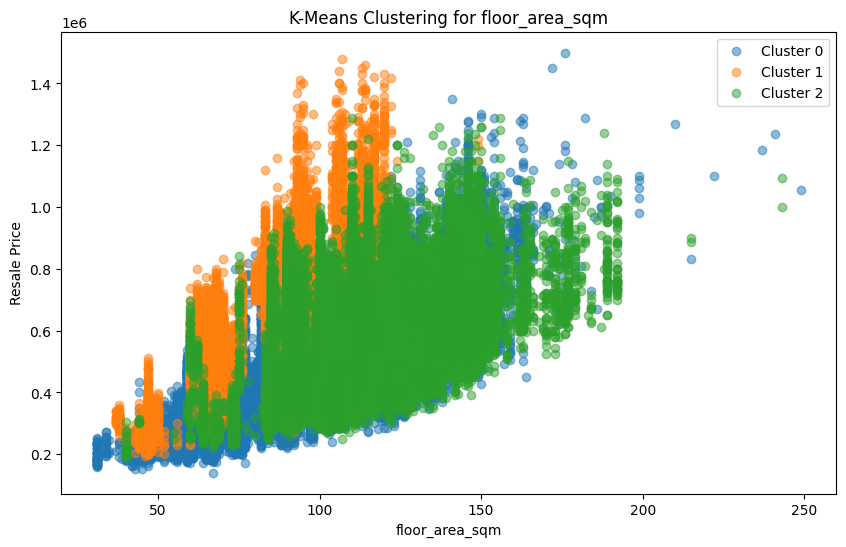

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


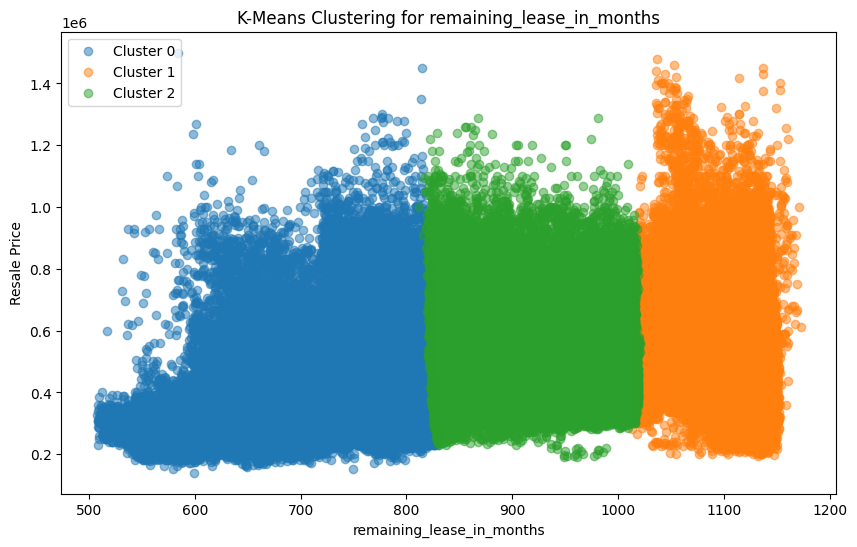

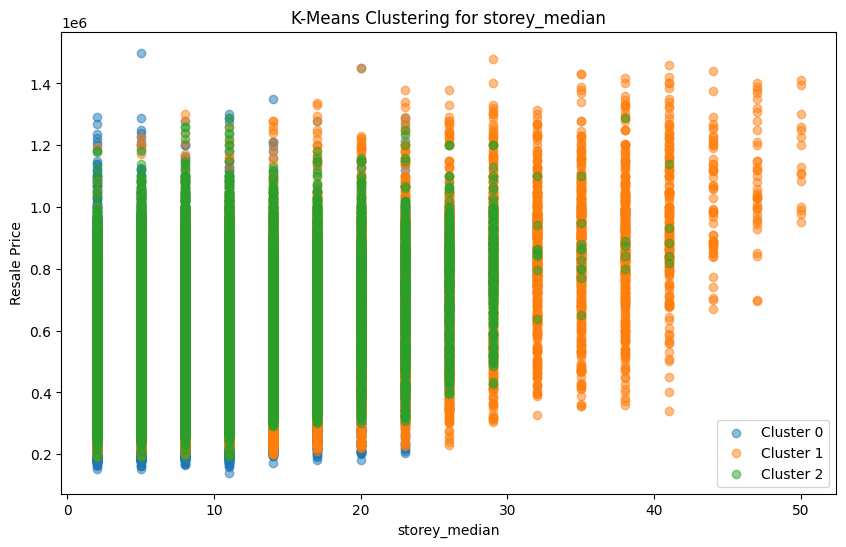

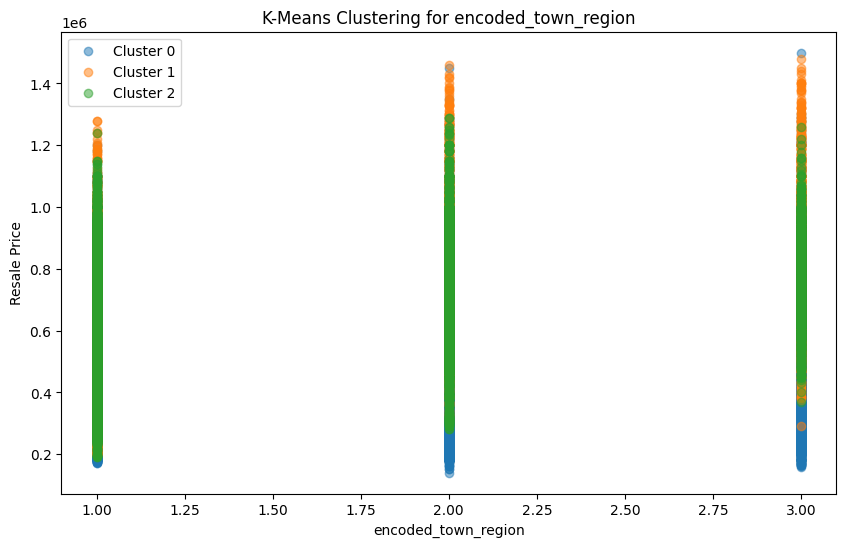

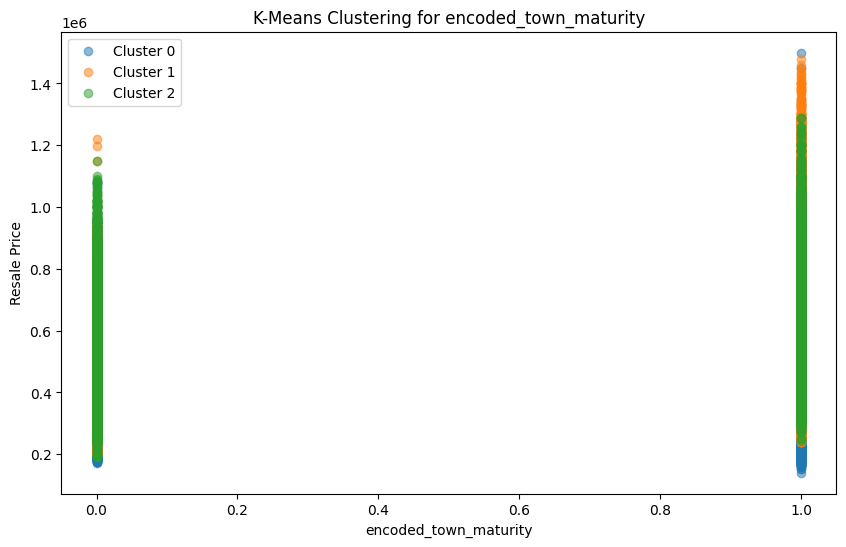

In [143]:
import matplotlib.pyplot as plt

# List of features to loop through
features = ['floor_area_sqm', 'remaining_lease_in_months', 'storey_median', 'encoded_town_region', 'encoded_town_maturity']

# Create a scatter plot for each feature to visualize the clustered data
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.title(f'K-Means Clustering for {feature}')

    for cluster_id in range(k):
        cluster_data = df_dropped[df_dropped['cluster'] == cluster_id]
        plt.scatter(cluster_data[feature], cluster_data['resale_price'], label=f'Cluster {cluster_id}', alpha=0.5)

    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.legend()
    plt.show()

In [144]:
df_dropped.pivot_table(index='cluster', values='resale_price', aggfunc={'resale_price': ['min', 'max', 'mean', 'median']})

,max,mean,median,min
cluster,,,,
0,1500000.0,419643.650061,380000.0,140000.0
1,1480000.0,555755.496410,525000.0,195000.0
2,1288888.0,517223.189255,488888.0,190000.0


Based on the distribution chart and descriptive statistics above, it can be concluded that:
- Cluster 1 can be inferred as the "Very affordable" category
- Cluster 2 can be inferred as the "Affordable" category
- Cluster 0 can be inferred as the "Not Affordable" category

###**Regression - Model Selection & Evaluation (Linear, Decision Tree, and Random Forest)**

In [145]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Separate features and target variable
X = df_dropped.drop(['cluster', 'resale_price','flat_model', 'flat_type', 'town', 'flat_town_type', 'flat_town_model', 'flat_type_model'], axis=1)  # Remove 'cluster' and 'price' columns
y = df_dropped['resale_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

# Decision Tree Regression Model
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
decision_tree_pred = decision_tree_reg.predict(X_test)

# Random Forest Regression Model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)
random_forest_pred = random_forest_reg.predict(X_test)

# Evaluate the models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Regression Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("")

evaluate_model(linear_reg, "Linear")
evaluate_model(decision_tree_reg, "Decision Tree")
evaluate_model(random_forest_reg, "Random Forest")

Linear Regression Metrics:
Mean Absolute Error (MAE): 73158.18
Mean Squared Error (MSE): 8437908729.60
Root Mean Squared Error (RMSE): 91858.09
R-squared (R²): 0.71

Decision Tree Regression Metrics:
Mean Absolute Error (MAE): 58546.74
Mean Squared Error (MSE): 6754121344.93
Root Mean Squared Error (RMSE): 82183.46
R-squared (R²): 0.77

Random Forest Regression Metrics:
Mean Absolute Error (MAE): 51317.69
Mean Squared Error (MSE): 4879043048.54
Root Mean Squared Error (RMSE): 69850.15
R-squared (R²): 0.83



Based on the result, it is shown that the Random Forest Regression model performs the best based on the selected metrics (MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error). This can be shown because Random Forest Regression model has the highest R-squared value and the lowest MAE, MSE, and RMSE

##**Random Forest Regressor - Implementation and Important Features**

                     Feature  Importance
0             floor_area_sqm    0.517714
1  remaining_lease_in_months    0.204338
3        encoded_town_region    0.171647
4      encoded_town_maturity    0.061282
2              storey_median    0.045019


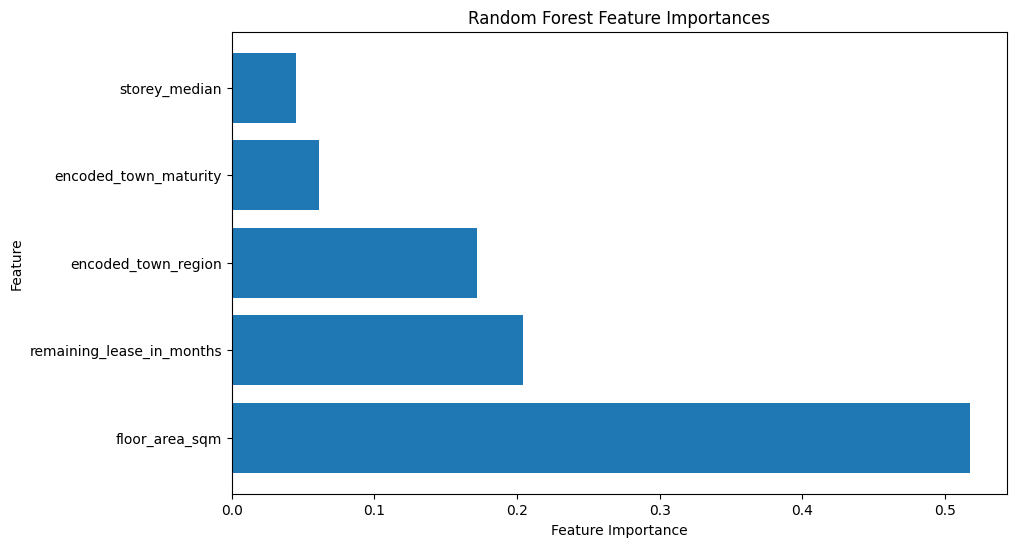

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_reg.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()


Top 3 important features based on the random forest features are:

1.   floor_area_sqm | Importance = 0.517714
2.   remaining_lease_in_months | Importance = 0.204338
3.   encoded_town_region | Importance = 0.171647       

In [147]:
# Drop the 'resale_price' column from the DataFrame before making predictions
features_for_prediction = df_dropped.drop(['cluster', 'resale_price', 'flat_model', 'flat_type', 'town', 'flat_town_type', 'flat_town_model', 'flat_type_model'], axis=1)

# Use the trained Random Forest Regressor model to predict resale prices
df_dropped['resale_price_predicted'] = random_forest_reg.predict(features_for_prediction)


<ipython-input-147-fc2632c501ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['resale_price_predicted'] = random_forest_reg.predict(features_for_prediction)


In [148]:
df_dropped

,town,flat_type,flat_model,flat_town_type,flat_town_model,flat_type_model,floor_area_sqm,remaining_lease_in_months,storey_median,encoded_town_region,encoded_town_maturity,resale_price,cluster,resale_price_predicted
0,ANG MO KIO,2 ROOM,Improved,ANG MO KIO 2 ROOM,ANG MO KIO Improved,2 ROOM Improved,44.0,736,11.0,1,1,232000.0,0,237830.000000
1,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,727,2.0,1,1,250000.0,0,273420.168816
2,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,749,2.0,1,1,262000.0,0,297417.623377
3,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,68.0,745,5.0,1,1,265000.0,0,325676.694139
4,ANG MO KIO,3 ROOM,New Generation,ANG MO KIO 3 ROOM,ANG MO KIO New Generation,3 ROOM New Generation,67.0,749,2.0,1,1,265000.0,0,297417.623377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164819,YISHUN,5 ROOM,Improved,YISHUN 5 ROOM,YISHUN Improved,5 ROOM Improved,112.0,1093,14.0,1,0,670000.0,1,657914.861111
164820,YISHUN,EXECUTIVE,Maisonette,YISHUN EXECUTIVE,YISHUN Maisonette,EXECUTIVE Maisonette,148.0,767,8.0,1,0,830000.0,0,766253.333333
164821,YISHUN,EXECUTIVE,Apartment,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,142.0,764,5.0,1,0,753000.0,0,779337.927619
164822,YISHUN,EXECUTIVE,Apartment,YISHUN EXECUTIVE,YISHUN Apartment,EXECUTIVE Apartment,142.0,756,11.0,1,0,808000.0,0,713582.666667


##**Regression - Property Agent Case (Kind of Flat to Suggest)**

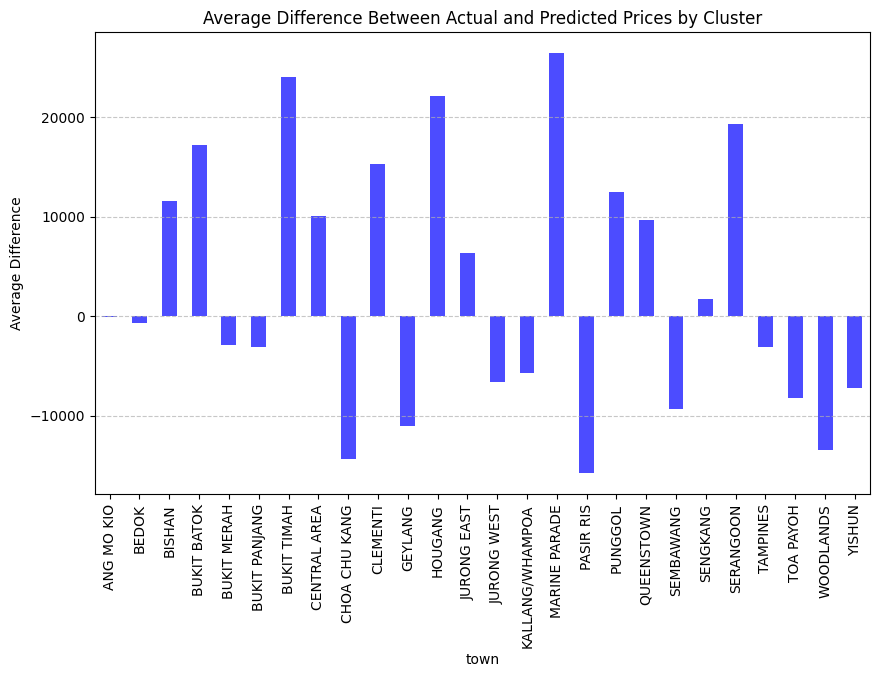

In [151]:
import matplotlib.pyplot as plt

# Group the data by the "cluster" column and calculate the average price difference for each cluster
average_differences = df_dropped.groupby('town')['resale_price'].mean() - df_dropped.groupby('town')['resale_price_predicted'].mean()

# Create a bar chart to visualize the average price differences by cluster
plt.figure(figsize=(10, 6))
average_differences.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('town')
plt.ylabel('Average Difference')
plt.title('Average Difference Between Actual and Predicted Prices by Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [152]:
import matplotlib.pyplot as plt

# Create a pivot table to calculate the average price difference for each flat_town_model
temp_piv1 = (df_dropped.pivot_table(values='resale_price', index='town', aggfunc='mean')).reset_index()
temp_piv1 = temp_piv1.rename(columns={'resale_price': 'avg_resale_price'})

temp_piv2 = (df_dropped.pivot_table(values='resale_price_predicted', index='town', aggfunc='mean')).reset_index()
temp_piv2 = temp_piv2.rename(columns={'resale_price_predicted': 'avg_resale_price_predicted'})

temp_piv_join = temp_piv1.merge(temp_piv2, on='town', how='left')

temp_piv_join['average_differences'] = temp_piv_join['avg_resale_price'] - temp_piv_join['avg_resale_price_predicted']
temp_piv_join.sort_values(by='average_differences').head(3)

,town,avg_resale_price,avg_resale_price_predicted,average_differences
16,PASIR RIS,545732.405812,561494.880445,-15762.474634
8,CHOA CHU KANG,454924.692854,469302.236469,-14377.543615
24,WOODLANDS,437536.951291,450973.589387,-13436.638096


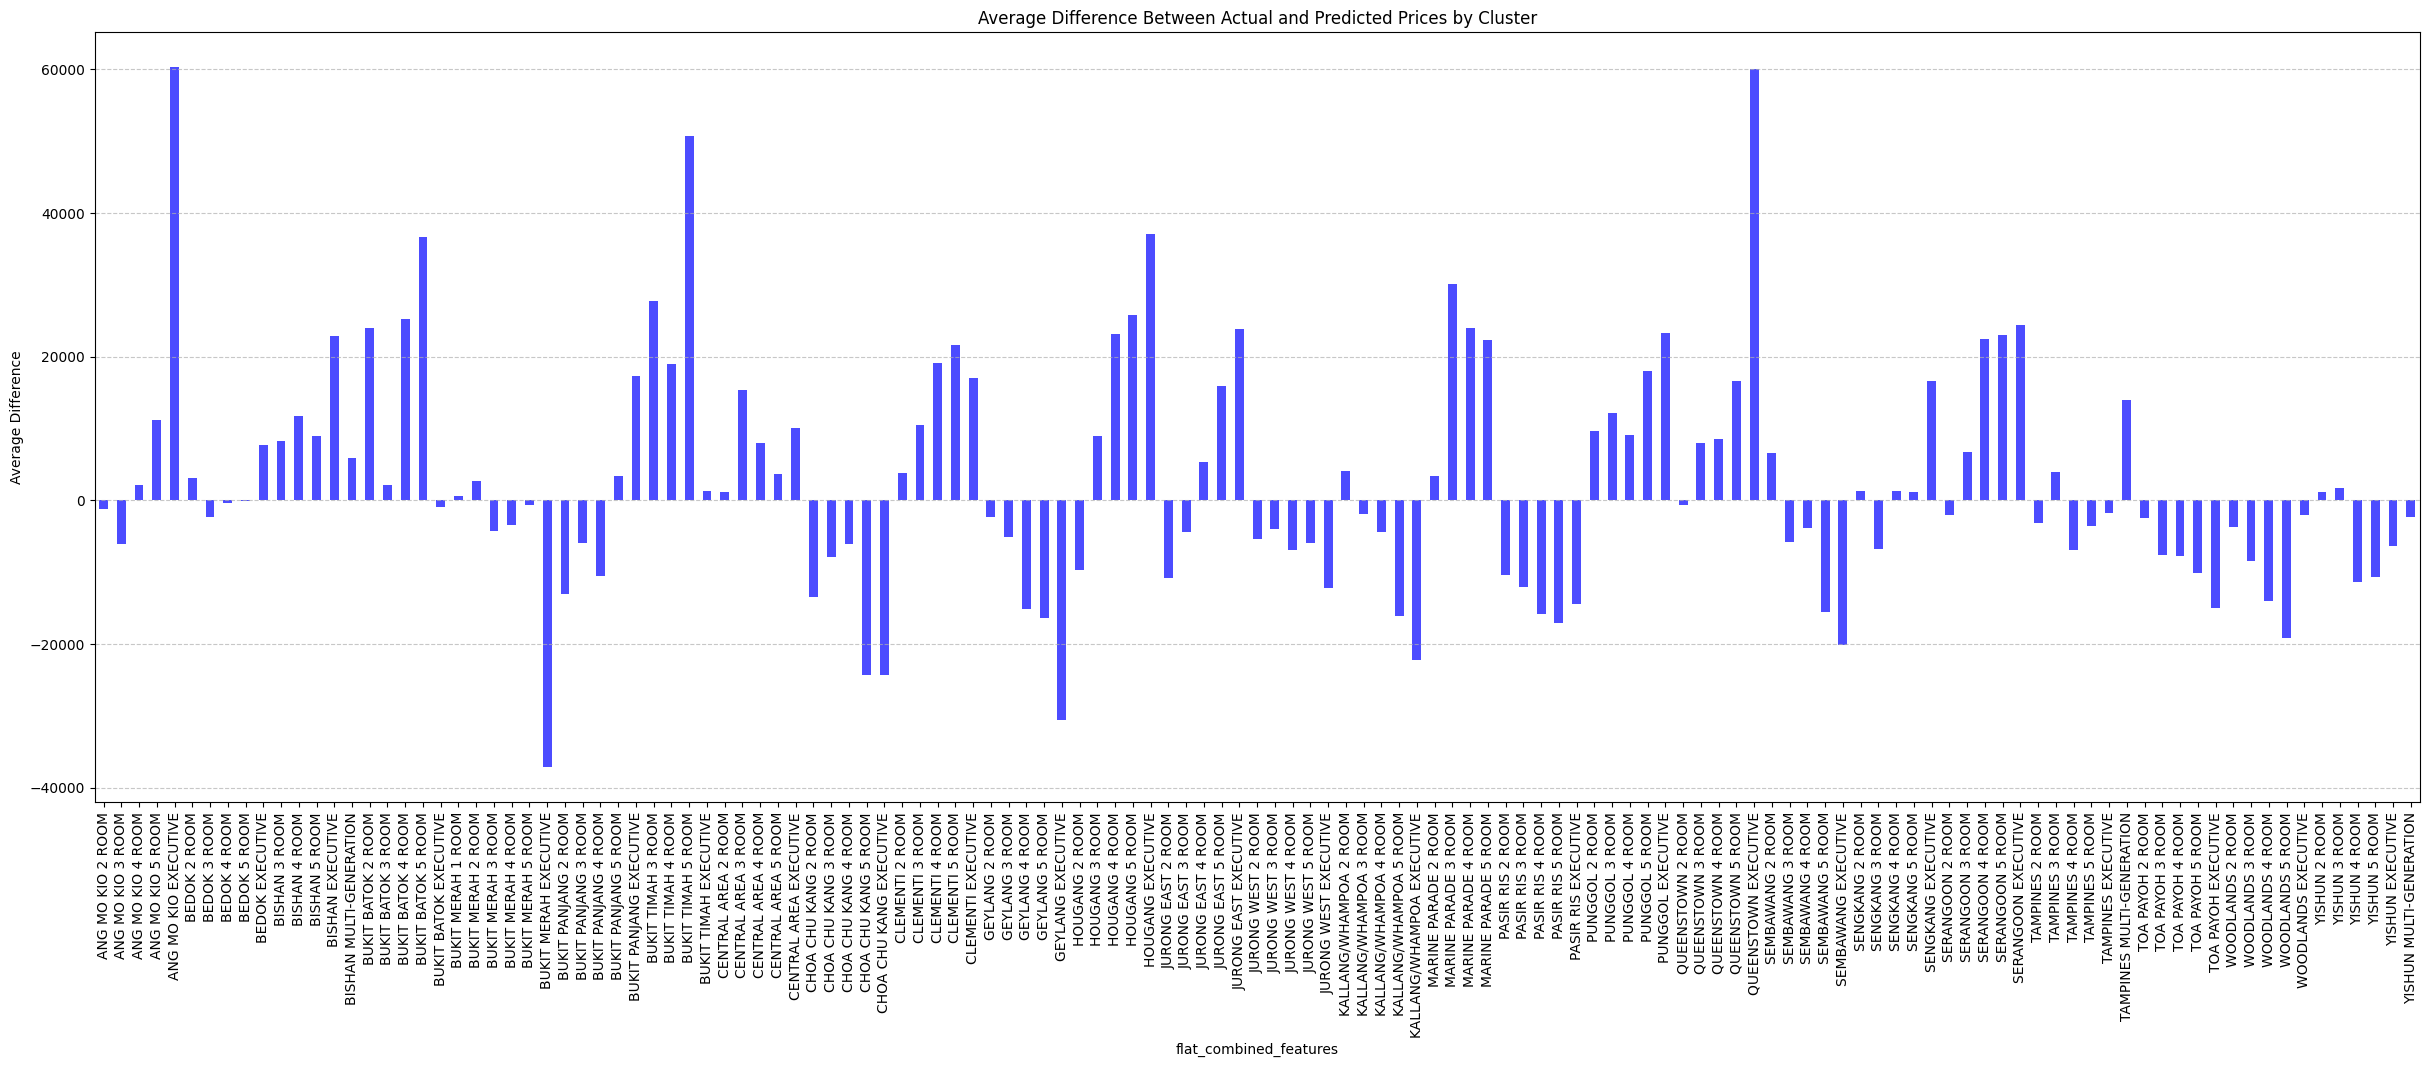

In [153]:
import matplotlib.pyplot as plt

# Group the data by the "cluster" column and calculate the average price difference for each cluster
average_differences = df_dropped.groupby('flat_town_type')['resale_price'].mean() - df_dropped.groupby('flat_town_type')['resale_price_predicted'].mean()

# Create a bar chart to visualize the average price differences by cluster
plt.figure(figsize=(30, 10))
average_differences.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('flat_combined_features')
plt.ylabel('Average Difference')
plt.title('Average Difference Between Actual and Predicted Prices by Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [154]:
import matplotlib.pyplot as plt

# Create a pivot table to calculate the average price difference for each flat_town_type
temp_piv1 = (df_dropped.pivot_table(values='resale_price', index='flat_town_type', aggfunc='mean')).reset_index()
temp_piv1 = temp_piv1.rename(columns={'resale_price': 'avg_resale_price'})

temp_piv2 = (df_dropped.pivot_table(values='resale_price_predicted', index='flat_town_type', aggfunc='mean')).reset_index()
temp_piv2 = temp_piv2.rename(columns={'resale_price_predicted': 'avg_resale_price_predicted'})

temp_piv_join = temp_piv1.merge(temp_piv2, on='flat_town_type', how='left')

temp_piv_join['average_differences'] = temp_piv_join['avg_resale_price'] - temp_piv_join['avg_resale_price_predicted']
temp_piv_join.sort_values(by='average_differences')

,flat_town_type,avg_resale_price,avg_resale_price_predicted,average_differences
25,BUKIT MERAH EXECUTIVE,7.856667e+05,822807.960000,-37141.293333
54,GEYLANG EXECUTIVE,7.951040e+05,825714.791375,-30610.742890
43,CHOA CHU KANG 5 ROOM,4.950911e+05,519421.065523,-24329.940377
44,CHOA CHU KANG EXECUTIVE,5.934661e+05,617790.171566,-24324.101437
74,KALLANG/WHAMPOA EXECUTIVE,8.456268e+05,867795.434818,-22168.624007
...,...,...,...,...
18,BUKIT BATOK 5 ROOM,6.166696e+05,579967.485721,36702.110503
59,HOUGANG EXECUTIVE,7.273074e+05,690297.519034,37009.907498
33,BUKIT TIMAH 5 ROOM,8.559314e+05,805231.548526,50699.865091
93,QUEENSTOWN EXECUTIVE,1.044100e+06,984027.285198,60072.714802


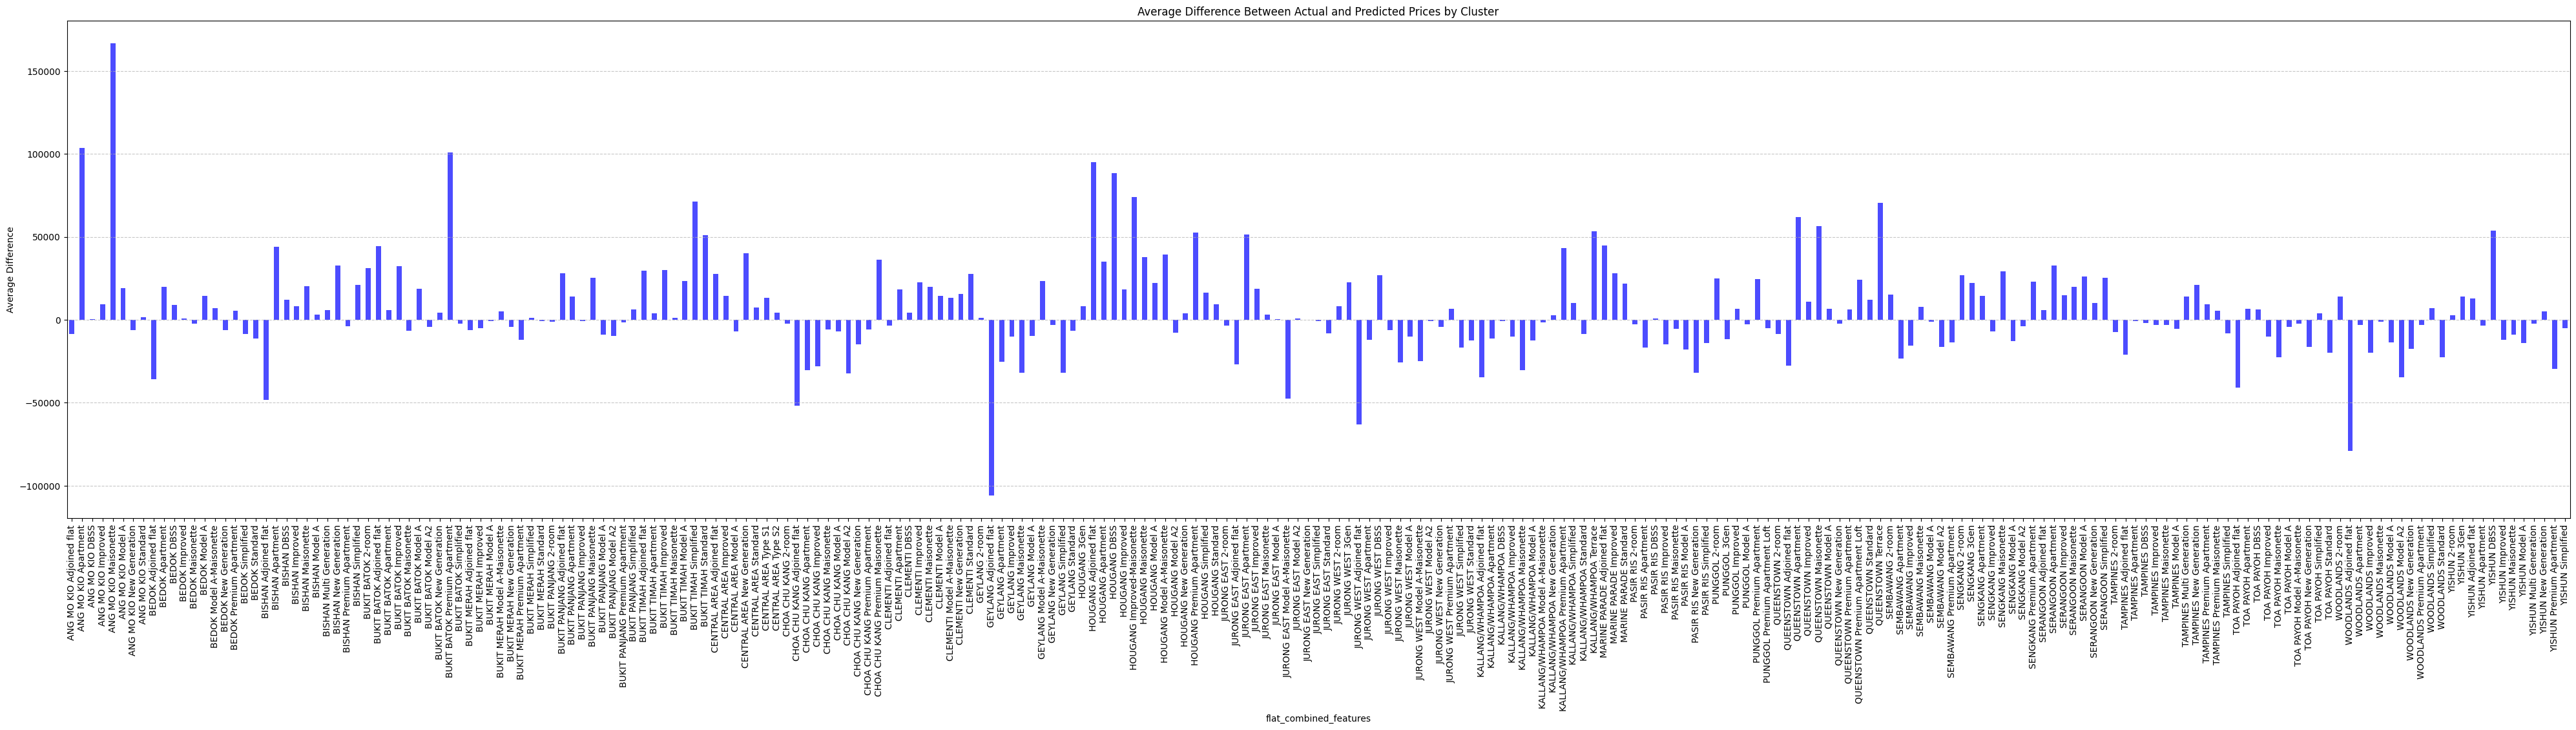

In [155]:
import matplotlib.pyplot as plt

# Group the data by the "cluster" column and calculate the average price difference for each cluster
average_differences = df_dropped.groupby('flat_town_model')['resale_price'].mean() - df_dropped.groupby('flat_town_model')['resale_price_predicted'].mean()

# Create a bar chart to visualize the average price differences by cluster
plt.figure(figsize=(50, 10))
average_differences.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('flat_combined_features')
plt.ylabel('Average Difference')
plt.title('Average Difference Between Actual and Predicted Prices by Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [156]:
import matplotlib.pyplot as plt

# Create a pivot table to calculate the average price difference for each flat_town_model
temp_piv1 = (df_dropped.pivot_table(values='resale_price', index='flat_town_model', aggfunc='mean')).reset_index()
temp_piv1 = temp_piv1.rename(columns={'resale_price': 'avg_resale_price'})

temp_piv2 = (df_dropped.pivot_table(values='resale_price_predicted', index='flat_town_model', aggfunc='mean')).reset_index()
temp_piv2 = temp_piv2.rename(columns={'resale_price_predicted': 'avg_resale_price_predicted'})

temp_piv_join = temp_piv1.merge(temp_piv2, on='flat_town_model', how='left')

temp_piv_join['average_differences'] = temp_piv_join['avg_resale_price'] - temp_piv_join['avg_resale_price_predicted']
temp_piv_join.sort_values(by='average_differences')

,flat_town_model,avg_resale_price,avg_resale_price_predicted,average_differences
90,GEYLANG Adjoined flat,579257.263158,685219.543158,-105962.280000
223,WOODLANDS Adjoined flat,481833.333333,561066.968133,-79233.634800
126,JURONG WEST Adjoined flat,567209.777778,630259.187037,-63049.409259
71,CHOA CHU KANG Adjoined flat,654962.666667,706870.246667,-51907.580000
19,BISHAN Adjoined flat,494000.000000,542367.760000,-48367.760000
...,...,...,...,...
102,HOUGANG DBSS,666965.788945,578525.718531,88440.070413
100,HOUGANG Adjoined flat,704396.571429,609579.542857,94817.028571
37,BUKIT BATOK Premium Apartment,702439.774809,601676.631721,100763.143089
1,ANG MO KIO Apartment,875208.952381,771607.503944,103601.448437


The value from the chart shows the average difference between the actual price and the predicted value using Random Forest Regression. The value can infer whether the flat itself is under value (negative value) and over value (positive value)

#**Conclusion & Recommendation**
- Top 3 factors that affect the flat resale price are floor area (in sqm), remaining lease, and town region.
- Top 3 average under value flat that recommend to buy is located in PASIR RIS, CHOA CHU KANG, AND WOODLANDS
- IF the case the property agent looking for specific flat type (based on room), it is recommended to purchase the flat on:
  - 1 Room (BUKIT MERAH)
  - 2 Room (CHOA CHU KANG)
  - 3 Room (PASIR RIS)
  - 4 Room (PASIR RIS)
  - 5 Room (CHOA CHU KANG)
  - Executive (BUKIT MERAH)
  - Multi Generation (YISHUN)
